# Анализ вакансий на позиции Data Analyst и Data Science 
В ходе исследования необходимо выявить различия для Аналитиков данных и специалистов по Data Science.

**Описание данных:**  
id - номер вакансии;  
name - наименование вакансии;  
published_at - дата публикации вакансии;  
type - тип вакансии;  
employer - наименование работодателя;  
department - подразделение работодателя;  
area - регион;  
experience - требуемый опыт работы;  
key_skills - требуемые навыки;  
schedule - график работы;  
employment - тип занятости;  
description - описание;  
description_lemmatized - лемматизация описания;  
salary_from - начальная зарплата (зарплата от);  
salary_to - максиальная зарплата (зарплата до);  
salary_bin - зарплата;  
key_skills_from_key_skills_field - ключевые навыки;  
hard_skills_from_description - 'хард скилы' из описания;  
soft_skills_from_description - 'софт скилы' из описания.

**Цель данных**  
Выявить различия для Аналитиков данных и специалистов по Data Science

**Ход исследования:**
- Открытие данных и их объединение;
- Предобработка данных;
- Проведение исследовательского анализа данных;
- Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Специалист по Data Science по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Ответ сформулировать отдельно для грейдов Junior, Junior+, Middle, Senior;
- Определение типичного места работы для Аналитика данных и специалист по Data Science по следующим параметрам: ТОП-работодателей, зарплата, тип занятости, график работы. Ответ сформулировать отдельно для грейдов Junior, Junior+, Middle, Senior;
- Расчет помесячной динамики количества вакансий для Аналитика данных и специалиста по Data Science. Ответ сформулировать отдельно для грейдов Junior, Junior+, Middle, Senior;
- Формулирование выводов и рекомендаций;
- Создание презентации.

## Открытие данных и их объединение

In [1]:
import pandas as pd # Импортируем необходимые библиотеки.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
pd.set_option('display.max_rows', None)

In [2]:
data_ds = pd.read_excel(r'C:\Users\Shand\Desktop\Data\vacancies_ds.xlsx') # Прочитаем данные по специалистам Data Science 

In [3]:
data_ds.head(10) # Выведем данные по специалистам Data Science  

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,67411146,"Ведущий Data Scientist, Ранжирование поиска",2024-04-02 11:20:17,https://hh.ru/vacancy/67411146,Открытая,Ozon,Ozon Информационные технологии,Москва,Middle (3-6 years),"['IT', 'Разработка поисковых технологий', 'dat...",Удаленная работа,Полная занятость,у нас петабайты реальных логов событий пользов...,петабайт реальный лог событие пользователь воз...,NaN,NaN,ЗП не указана,"Python, data science, Разработка поисковых тех...",NaN,NaN
1,78465611,Управляющий директор \ Data Scientist (Сопрово...,2024-04-27 10:10:12,https://hh.ru/vacancy/78465611,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Middle (3-6 years),"['Оценка рисков', 'Управление рисками', 'MS Po...",Полный день,Полная занятость,наша команда контроля и управления моделями яв...,наш команда контроль управление модель являтьс...,NaN,NaN,ЗП не указана,"Оценка рисков, MS PowerPoint, Статистический а...",NaN,NaN
2,81857265,Associate Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857265,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Middle (3-6 years),"['Machine Learning', 'Public Speaking', 'Writi...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,NaN
3,81857296,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857296,Открытая,Университет Иннополис,NaN,Москва,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов
4,81857358,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857358,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов
5,83575438,Senior Data Scientist в команду «Матчинг»,2024-04-25 14:18:46,https://hh.ru/vacancy/83575438,Открытая,Профи (profi.ru),NaN,Москва,Middle (3-6 years),"['PHP', 'Spark', 'Базы данных', 'Python', 'Ela...",Удаленная работа,Полная занятость,"привет! я андрей, тимлид команды матчинга в ма...",привет андрей тимлид команда матчинга маркетпл...,330000.0,450000.0,Больше 300 тысяч,"Python, SQL, Spark, Базы данных, PHP, ClickHou...",NaN,NaN
6,86018279,Middle \ Senior Data Scientist в команду модел...,2024-04-23 17:15:40,https://hh.ru/vacancy/86018279,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Junior+ (1-3 years),"['Документация', 'R', 'Python', 'Креативность'...",Полный день,Полная занятость,"в команду, которая занимается разработкой моде...",команда заниматься разработка модель розничный...,NaN,NaN,ЗП не указана,"Python, SQL, Математическое моделирование, Мат...",NaN,"Коммуникация, Документация, Креативность"
7,86879304,Data scientist (команда Collection),2024-04-23 17:15:53,https://hh.ru/vacancy/86879304,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Middle (3-6 years),"['Документация', 'Python', 'Big Data', 'ML', '...",Полный день,Полная занятость,обязанности: разработка всего спектра моделе...,обязанность разработка весь спектр модель розн...,NaN,NaN,ЗП не указана,"SQL, Python, Математическое моделирование, Big...",NaN,Документация
8,87192229,Middle \ Senior Data scientist 

In [4]:
data_da = pd.read_excel(r'C:\Users\Shand\Desktop\Data\vacancies_da (2).xlsx') # Прочитаем данные по специалистам Data Analyst

In [5]:
data_da.head(10) # Выведем данные по специалистам Data Science

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,82978778,Data analyst,2024-04-09 10:29:02,https://hh.ru/vacancy/82978778,Открытая,Телеком биржа,NaN,Москва,Junior+ (1-3 years),"['HTTP', 'Pandas', 'Linux', 'Git', 'Clickhouse...",Полный день,Полная занятость,"кто мы: servicepipe - команда айтишников, кото...",servicepipe команда айтишник работать рынок иб...,NaN,NaN,ЗП не указана,"SQL, Математическая статистика, Linux, Clickho...",Pandas,NaN
1,85053195,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Inf...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация
2,85053196,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053196,Открытая,Axenix (ранее Accenture),NaN,Ростов-на-Дону,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Gre...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация
3,86081569,Data analyst / Аналитик данных,2024-04-27 23:34:50,https://hh.ru/vacancy/86081569,Открытая,IQnergy,NaN,Москва,Middle (3-6 years),"['Pandas', 'Анализ данных']",Полный день,Полная занятость,за последние 2 года мы (iqnergy) выросли в 5 р...,последний 2 год iqnergy вырастать 5 помогать o...,NaN,NaN,ЗП не указана,Анализ данных,Pandas,NaN
4,87407185,"Senior Data Analyst ""Growth""",2024-04-02 17:03:10,https://hh.ru/vacancy/87407185,Открытая,Okko,NaN,Санкт-Петербург,Middle (3-6 years),"['A/B тесты', 'confluence', 'SQL', 'Python']",Полный день,Полная занятость,"обязанности: аналитика привлечения, лояльност...",обязанность аналитика привлечение лояльность о...,NaN,NaN,ЗП не указана,"Python, SQL, A/B тесты",confluence,NaN
5,88605313,Data Analyst,2024-03-12 21:40:27,https://hh.ru/vacancy/88605313,Открытая,Бланк – банк для бизнеса,NaN,Москва,Junior+ (1-3 years),"['PowerBI', 'BigQuery', 'Tableau', 'ORACLE', '...",Удаленная работа,Полная занятость,"привет!мы – бланк, современный life-first моби...",привет бланк современный life first мобильный ...,NaN,NaN,ЗП не указана,"SQL, Python, Power BI, PowerBI, DAX, MS Power ...",NaN,NaN
6,89163933,Data Analyst WMS,2024-04-02 17:52:09,https://hh.ru/vacancy/89163933,Открытая,«UZUM TECHNOLOGIES».,NaN,Москва,Middle (3-6 years),[],Удаленная работа,Полная занятость,uzum — это новая уникальная компания в узбекис...,uzum новый уникальный компания узбекистан разв...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
7,89426458,Ведущий дата аналитик,2024-04-22 14:12:37,https://hh.ru/vacancy/89426458,Открытая,RUTUBE,NaN,Москва,Junior+ (1-3 years),"['Google Analytics', 'Анализ данных', 'Tableau...",Полный день,Полная занятость,"rutube - крупнейший российский видеохостинг, г...",rutube крупный российский видеохостинг собират...,NaN,NaN,ЗП не указана,"SQL, Аналитика, Python, Анализ данных, Работа ...",NaN,NaN
8,89605363,Аналитик данных / Дата аналитик / data analyst...,2024-03-20 15:43:04,https://hh.ru/vacancy/89605363,Открытая,ПСБ (ПАО «Промсвязьбанк»),"ПАО «Промсвязьбанк», Бизнес и инфраструктура",Москва,Junior+ (1-3 years),"['Анализ рисков', 'Анализ данных', 'Оценка рис...",Полный день,Полная занятость,ключевые задачи: разработка и внедрение подхо...,ключевой задача разработка внедрение подход вы...,NaN,NaN,ЗП не указана,"SQL, MS SQL, Анализ рисков, Риск-менеджмент, О...",NaN,Аналитическое мышление
9,89667235,Аналитик данных / Data Analyst,2024-04-17 13:11:37,https://hh.ru/vacancy/89667235,Откры

In [6]:
data_ds['type'] = 'ds'
data_da['type'] = 'da'

In [7]:
data = pd.concat((data_ds, data_da))

In [8]:
data = data.reset_index(drop=True) # Сбросим индексы

In [9]:
data.tail(20)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
952,97831652,Data Analyst,2024-04-24 16:47:53,https://hh.ru/vacancy/97831652,da,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,наша команда занимается разработкой и внедрени...,наш команда заниматься разработка внедрение ml...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN
953,97836831,Data Analyst GigaChat,2024-04-24 17:51:05,https://hh.ru/vacancy/97836831,da,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),[],Полный день,Полная занятость,кластер аналитики расширяет команду для лучшег...,кластер аналитик расширять команда хороший уче...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
954,97876200,Senior Data Analyst (Pharma) / Старший аналити...,2024-04-25 09:43:06,https://hh.ru/vacancy/97876200,da,АДВ,NaN,Москва,Middle (3-6 years),['Документация'],Полный день,Полная занятость,"в подразделение группы компаний адв, специализ...",подразделение группа компания адва специализир...,NaN,NaN,ЗП не указана,NaN,NaN,Документация
955,97882438,Data Analyst (SQL),2024-04-25 10:42:38,https://hh.ru/vacancy/97882438,da,WILDBERRIES,NaN,Москва,Junior+ (1-3 years),['SQL'],Полный день,Полная занятость,wildberries — это крупнейшая в странах еаэс ме...,wildberries крупный страна еаэс международный ...,NaN,NaN,ЗП не указана,SQL,NaN,NaN
956,97920980,Lead data analyst,2024-04-28 15:33:57,https://hh.ru/vacancy/97920980,da,ФЛАУВАУ,NaN,Москва,Middle (3-6 years),"['Документация', 'Data Analysis', 'Анализ данн...",Полный день,Полная занятость,"flowwow - маркетплейс, где продают свои товары...",flowwow маркетплейс продавать свой товар тысяч...,NaN,NaN,ЗП не указана,"SQL, Анализ данных, Data Analysis",NaN,Документация
957,97930834,Middle Data Analyst,2024-04-25 17:45:17,https://hh.ru/vacancy/97930834,da,"МАГНИТ, Розничная сеть",NaN,Москва,Junior+ (1-3 years),['Коммуникация'],Удаленная работа,Полная занятость,привет! наша команда занимается разработкой со...,привет наш команда заниматься разработка собст...,NaN,NaN,ЗП не указана,NaN,NaN,Коммуникация
958,97931918,Junior Data Analyst,2024-04-25 18:04:18,https://hh.ru/vacancy/97931918,da,"РЕСО-Гарантия, САО","РЕСО-Гарантия, САО, IT",Москва,Junior (no experince),['Аналитическое мышление'],Полный день,Полная занятость,о нас. компания ресо-гарантия – один из лидеро...,компания ресо гарантия лидер страхование росси...,NaN,NaN,ЗП не указана,NaN,NaN,Аналитическое мышление
959,97935983,Data analyst (fintech),2024-04-25 19:24:10,https://hh.ru/vacancy/97935983,da,Центр Орбита,NaN,Москва,Junior+ (1-3 years),"['Документация', 'ORACLE', 'Postgres', 'Apache...",Удаленная работа,Полная занятость,центр орбита - ведущий разработчик цифровых ре...,центр орбита ведущий разработчик цифровой реше...,NaN,NaN,ЗП не указана,"ORACLE, Postgres, SQL, Power BI, MS Olap, IPC,...",NaN,"Коммуникация, Документация"
960,97937407,Senior Data Analyst в Блок Финансы,2024-04-25 20:04:57,https://hh.ru/vacancy/97937407,da,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),[],Полный день,Полная занятость,мы - команда управления моделирования и исслед...,команда управление моделирование исследование ...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
961,97941141,Data Analyst,2024-04-25 21:58:06,https://hh.ru/vacancy/97941141,da,МегаФон,"МегаФон, IT",Москва,Middle (3-6 years),"['Python', 'MS SQL', 'A/B тесты', 'Аналитика',...",Удаленная работа,Полная занятость,"чем предстоит заниматься генерировать идеи, и...",предстоять заниматься генерировать идея искать...,NaN,NaN,ЗП не указана,"SQL, Python, A/B тесты, MS SQL, Аналитика",NaN,NaN


## Предобработка данных

### Тип данных

In [10]:
data.info() # Посмотрим общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                972 non-null    int64         
 1   name                              972 non-null    object        
 2   published_at                      972 non-null    datetime64[ns]
 3   alternate_url                     972 non-null    object        
 4   type                              972 non-null    object        
 5   employer                          972 non-null    object        
 6   department                        362 non-null    object        
 7   area                              972 non-null    object        
 8   experience                        972 non-null    object        
 9   key_skills                        972 non-null    object        
 10  schedule                          972 non-null    

Типы данных установлены верно. 

In [11]:
data['published_at'] = pd.to_datetime(data['published_at']).dt.date # Оставим только дату без указания времени.

### Пропуски

In [12]:
data.isna().sum()

id                                    0
name                                  0
published_at                          0
alternate_url                         0
type                                  0
employer                              0
department                          610
area                                  0
experience                            0
key_skills                            0
schedule                              0
employment                            0
description                           0
description_lemmatized                0
salary_from                         891
salary_to                           891
salary_bin                            0
key_skills_from_key_skills_field    434
hard_skills_from_description        552
soft_skills_from_description        692
dtype: int64

In [13]:
data['department'] = data['department'].fillna('нет данных') # Пропуски в столбце 'department' заменим на 'нет данных'

Посмотрим, сможем ли мы доработать значения в столбце salary_bin

In [14]:
data['salary_bin'].value_counts() # Посмотрим данные в столбце salary_bin

ЗП не указана                891
Больше 300 тысяч              36
От 200 тысяч до 300 тысяч     25
От 100 тысяч до 200 тысяч     14
Меньше 100 тысяч               6
Name: salary_bin, dtype: int64

In [15]:
data.loc[(data['salary_from'] > 0) & (data['salary_to'].isna())] # Посмотрим есть ли строки в которых указана начальная зарплата, 
                                                                # но не указано значение в salary_bin

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
11,88623848,Data Scientist,2024-03-23,https://hh.ru/vacancy/88623848,ds,Специальный Технологический Центр (ООО СТЦ),нет данных,Санкт-Петербург,Junior+ (1-3 years),"['ffmpeg', 'soxi', 'Kaldi', 'TensorFlow', 'lib...",Полный день,Полная занятость,специальный технологический центр (ооо стц) ра...,специальный технологический центр стц работать...,200000.0,NaN,ЗП не указана,"Kaldi, PyTorch, TensorFlow, librosa, ffmpeg, soxi",NaN,NaN
19,89761049,Data Scientist / CV Researcher (Middle+/Senior),2024-04-20,https://hh.ru/vacancy/89761049,ds,Филиал в г. Санкт-Петербург АО Концерн Радиост...,нет данных,Санкт-Петербург,Middle (3-6 years),[],Полный день,Полная занятость,"мы - современная, активно развивающаяся компан...",современный активно развивающийся компания спе...,200000.0,NaN,ЗП не указана,NaN,NaN,NaN
67,92068025,"Аналитик данных (data scientist, data engineer)",2024-03-12,https://hh.ru/vacancy/92068025,ds,Федеральное государственное автономное учрежде...,нет данных,Москва,Middle (3-6 years),"['Документация', 'Создание моделей', 'Оформлен...",Полный день,Полная занятость,в настоящее время фгау «нии «цэпп» расширяет к...,настоящий время фгау нии цэпп расширять команд...,100000.0,NaN,ЗП не указана,"Python, Системы автоматического контроля, Созд...",NaN,Документация
75,92347612,Разработчик Data Science NLP (Middle),2024-04-23,https://hh.ru/vacancy/92347612,ds,Лаборатория Наносемантика,нет данных,Москва,Middle (3-6 years),"['Linux', 'Git', 'Docker', 'API', 'PyTorch']",Полный день,Полная занятость,«наносемантика» — ведущий разработчик технолог...,наносемантика ведущий разработчик технология и...,160000.0,NaN,ЗП не указана,"Docker, API, Linux, Git, PyTorch",NaN,NaN
81,92510030,Data scientist (Департамент развития отношений...,2024-04-15,https://hh.ru/vacancy/92510030,ds,Банк Русский Стандарт,нет данных,Москва,Junior+ (1-3 years),"['Oracle Pl/SQL', 'Аналитика продаж', 'Аналити...",Полный день,Полная занятость,обязанности: построение скоринговых моделей в...,обязанность построение скоринговый модель pyth...,150000.0,NaN,ЗП не указана,"Аналитика продаж, Oracle Pl/SQL",NaN,Аналитическое мышление
89,92740691,Data scientist,2024-04-15,https://hh.ru/vacancy/92740691,ds,Finstar Financial Group,нет данных,Москва,Junior+ (1-3 years),"['Английский язык', 'Анализ данных', 'Python',...",Полный день,Полная занятость,finstar financial group – крупный международны...,finstar financial group крупный международный ...,187000.0,NaN,ЗП не указана,"Python, SQL, Английский язык, Математическое м...",NaN,Коммуникация
147,94250459,Senior Data Scientist (IT),2024-04-01,https://hh.ru/vacancy/94250459,ds,ЛИГРЕС,нет данных,Санкт-Петербург,Middle (3-6 years),"['Machine Learning', 'Анализ данных', 'програм...",Полный день,Полная занятость,"«legal resourсes» занимается сбором, хранением...",legal resourсes заниматься сбор хранение обраб...,170000.0,NaN,ЗП не указана,"машинное обучение, Анализ данных, программиров...",NaN,Коммуникация
148,94250539,Middle Data Scientist (IT),2024-04-01,https://hh.ru/vacancy/94250539,ds,ЛИГРЕС,нет данных,Санкт-Петербург,Middle (3-6 years),"['Machine Learning', 'Pandas', 'Анализ данных'...",Полный день,Полная занятость,"«legal resourсes» занимается сбором, хранением...",legal resourсes заниматься сбор хранение обраб...,120000.0,NaN,ЗП не указана,"машинное обучение, Анализ данных, программиров...",Pandas,NaN
173,94513812,Senior Data Scientist,2024-04-01,https://hh.ru/vacancy/94513812,ds,Куарми,нет данных,Москва,Middle (3-6 years),['Pandas'],Полный день,Полная занятость,о проекте: социальная сеть для обмена фото/вид...,проект социальный сеть обмен фото видео контен...,280000.0,NaN,ЗП не указана,NaN,Pandas,NaN
260,94983164,Middle/Senior Data Scientist,2024-04-29,https://hh.ru/vacanc

В таких строках значения в столбце "salary_bin" укажаем исходя из значений в столбце "salary_from"

In [16]:
#pd.options.mode.chained_assignment = None

In [17]:
def categorize_income(income): #Напишем функцию
    try:
        if  income >= 300000.0:
            return 'Больше 300 тысяч'
        elif 200000.0 <= income < 300000.0:
            return 'От 200 тысяч до 300 тысяч'
        elif 100000.0 <= income < 200000.0:
            return 'От 100 тысяч до 200 тысяч'
        elif  income < 100000.0:
            return 'Меньше 100 тысяч'
    except:
        pass

In [18]:
data.loc[(data['salary_from'] > 0) & (data['salary_to'].isna()), 'salary_bin'] = data['salary_from'].apply(categorize_income) # Применим функцию

In [19]:
data.loc[(data['salary_from'] > 0) & (data['salary_to'].isna())] # Проверим значения

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
11,88623848,Data Scientist,2024-03-23,https://hh.ru/vacancy/88623848,ds,Специальный Технологический Центр (ООО СТЦ),нет данных,Санкт-Петербург,Junior+ (1-3 years),"['ffmpeg', 'soxi', 'Kaldi', 'TensorFlow', 'lib...",Полный день,Полная занятость,специальный технологический центр (ооо стц) ра...,специальный технологический центр стц работать...,200000.0,NaN,От 200 тысяч до 300 тысяч,"Kaldi, PyTorch, TensorFlow, librosa, ffmpeg, soxi",NaN,NaN
19,89761049,Data Scientist / CV Researcher (Middle+/Senior),2024-04-20,https://hh.ru/vacancy/89761049,ds,Филиал в г. Санкт-Петербург АО Концерн Радиост...,нет данных,Санкт-Петербург,Middle (3-6 years),[],Полный день,Полная занятость,"мы - современная, активно развивающаяся компан...",современный активно развивающийся компания спе...,200000.0,NaN,От 200 тысяч до 300 тысяч,NaN,NaN,NaN
67,92068025,"Аналитик данных (data scientist, data engineer)",2024-03-12,https://hh.ru/vacancy/92068025,ds,Федеральное государственное автономное учрежде...,нет данных,Москва,Middle (3-6 years),"['Документация', 'Создание моделей', 'Оформлен...",Полный день,Полная занятость,в настоящее время фгау «нии «цэпп» расширяет к...,настоящий время фгау нии цэпп расширять команд...,100000.0,NaN,От 100 тысяч до 200 тысяч,"Python, Системы автоматического контроля, Созд...",NaN,Документация
75,92347612,Разработчик Data Science NLP (Middle),2024-04-23,https://hh.ru/vacancy/92347612,ds,Лаборатория Наносемантика,нет данных,Москва,Middle (3-6 years),"['Linux', 'Git', 'Docker', 'API', 'PyTorch']",Полный день,Полная занятость,«наносемантика» — ведущий разработчик технолог...,наносемантика ведущий разработчик технология и...,160000.0,NaN,От 100 тысяч до 200 тысяч,"Docker, API, Linux, Git, PyTorch",NaN,NaN
81,92510030,Data scientist (Департамент развития отношений...,2024-04-15,https://hh.ru/vacancy/92510030,ds,Банк Русский Стандарт,нет данных,Москва,Junior+ (1-3 years),"['Oracle Pl/SQL', 'Аналитика продаж', 'Аналити...",Полный день,Полная занятость,обязанности: построение скоринговых моделей в...,обязанность построение скоринговый модель pyth...,150000.0,NaN,От 100 тысяч до 200 тысяч,"Аналитика продаж, Oracle Pl/SQL",NaN,Аналитическое мышление
89,92740691,Data scientist,2024-04-15,https://hh.ru/vacancy/92740691,ds,Finstar Financial Group,нет данных,Москва,Junior+ (1-3 years),"['Английский язык', 'Анализ данных', 'Python',...",Полный день,Полная занятость,finstar financial group – крупный международны...,finstar financial group крупный международный ...,187000.0,NaN,От 100 тысяч до 200 тысяч,"Python, SQL, Английский язык, Математическое м...",NaN,Коммуникация
147,94250459,Senior Data Scientist (IT),2024-04-01,https://hh.ru/vacancy/94250459,ds,ЛИГРЕС,нет данных,Санкт-Петербург,Middle (3-6 years),"['Machine Learning', 'Анализ данных', 'програм...",Полный день,Полная занятость,"«legal resourсes» занимается сбором, хранением...",legal resourсes заниматься сбор хранение обраб...,170000.0,NaN,От 100 тысяч до 200 тысяч,"машинное обучение, Анализ данных, программиров...",NaN,Коммуникация
148,94250539,Middle Data Scientist (IT),2024-04-01,https://hh.ru/vacancy/94250539,ds,ЛИГРЕС,нет данных,Санкт-Петербург,Middle (3-6 years),"['Machine Learning', 'Pandas', 'Анализ данных'...",Полный день,Полная занятость,"«legal resourсes» занимается сбором, хранением...",legal resourсes заниматься сбор хранение обраб...,120000.0,NaN,От 100 тысяч до 200 тысяч,"машинное обучение, Анализ данных, программиров...",Pandas,NaN
173,94513812,Senior Data Scientist,2024-04-01,https://hh.ru/vacancy/94513812,ds,Куарми,нет данных,Москва,Middle (3-6 years),['Pandas'],Полный день,Полная занятость,о проекте: социальная сеть для обмена фото/вид...,проект социальный сеть обмен фото видео контен...,280000.0,NaN,От 200

In [20]:
data['salary_bin'].value_counts() # Посмотрим данные в столбце salary_bin

ЗП не указана                857
Больше 300 тысяч              37
От 200 тысяч до 300 тысяч     33
От 100 тысяч до 200 тысяч     33
Меньше 100 тысяч              12
Name: salary_bin, dtype: int64

Пропуски в столбцах с указанием навыков оставим без изменений.

### Дубликаты

In [21]:
data.duplicated(subset='id').sum() # Посмотрим на наличие дубликатов

17

Как видно в данных имеется 17 дублей строк.  

In [22]:
data[data.duplicated(subset='id')] # Посмотрим подробнее какие строки дублируются

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
679,91765959,Дата аналитик (Data Scientist),2024-04-04,https://hh.ru/vacancy/91765959,da,Центр финансовых технологий,нет данных,Санкт-Петербург,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN
680,91765960,Дата аналитик (Data Scientist),2024-03-28,https://hh.ru/vacancy/91765960,da,Центр финансовых технологий,нет данных,Новосибирск,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN
718,93551149,Дата аналитик (Data Scientist),2024-03-19,https://hh.ru/vacancy/93551149,da,Центр финансовых технологий,нет данных,Казань,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN
736,94241749,Дата аналитик (Data Scientist),2024-03-28,https://hh.ru/vacancy/94241749,da,Центр финансовых технологий,нет данных,Томск,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN
737,94257136,Дата аналитик (Data Scientist),2024-03-28,https://hh.ru/vacancy/94257136,da,Центр финансовых технологий,нет данных,Екатеринбург,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN
755,94814473,Data scientist/Data Analyst,2024-03-15,https://hh.ru/vacancy/94814473,da,Градиентех,нет данных,Москва,Junior+ (1-3 years),"['Machine Learning', 'SciPy', 'Python', 'Numpy...",Полный день,Частичная занятость,о нас: мы it компания по развитию искусственно...,it компания развитие искусственный интеллект а...,NaN,NaN,ЗП не указана,"Python, Machine Learning, SciPy, PyTorch, Nump...",NaN,NaN
770,94956753,Data Analyst / Data Scientist (Junior/Junior+),2024-03-18,https://hh.ru/vacancy/94956753,da,Kept (Кэпт),нет данных,Москва,Junior+ (1-3 years),"['Pandas', 'Data Analysis', 'Git', 'Python', '...",Полный день,Полная занятость,мы в поиске талантливого кандидата на вакансию...,поиск талантливый кандидат вакансия data analy...,NaN,NaN,ЗП не указана,"Python, SQL, Математическая статистика, Git, D...",Pandas,NaN
801,95448125,Data Analyst / Data scientist middle,2024-04-15,https://hh.ru/vacancy/95448125,da,Автомакон,нет данных,Москва,Middle (3-6 years),[],Полный день,Полная занятость,на данный момент мы ищем &quot;data analyst/ d...,данный момент искать quot data analyst data sc...,NaN,300000.0,Больше 300 тысяч,NaN,NaN,NaN
814,95565175,Junior Data Scientist+Data Analyst (Команда AI...,2024-03-26,https://hh.ru/vacancy/95565175,da,СБЕР,Сбер для экспертов,Москва,Junior+ (1-3 years),['Pandas'],Полный день,Полная занятость,наша команда занимается развитием digital-зрел...,наш команда заниматься развитие digital зрелос...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN
819,95663230,Дата аналитик (Data Scientist),2024-03-28,https://hh.ru/vacancy/95663230,da,Центр финансовых технологий,нет данных,Москва,Middle (3-6 years),['Pandas'],Полный день,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN


In [23]:
data = data.drop_duplicates(subset='id') # Удалим дубликаты

In [24]:
data.duplicated(subset='id').sum() # Проверим наличие дубликатов

0

**Вывод по разделу:**
- для удобства анализа было осуществлено объединение двух таблиц в одну;
- изучены типы данных;
- дополнен значениями столбец "salary_bin", пропуски в столбце "department" заменены значением "нет данных";
- проведена проверка на наличие дубликатов строк. Дубли были удалены.

## Исследовательский анализ данных

Посмотрим на общее количество вакансий DA и DS

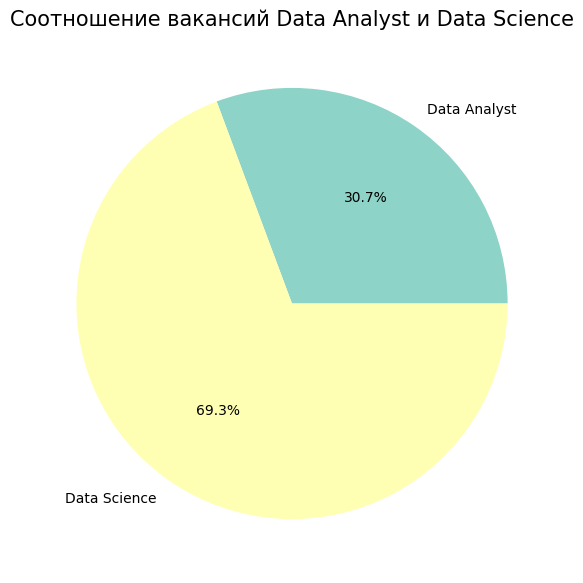

In [25]:
plt.figure(figsize=(7, 7))  # Построим круговой график соотношения вакансий DA и DS
color = sns.color_palette('Set3')
data.groupby('type')['id'].count().plot(kind='pie', labels=['Data Analyst', 'Data Science'], colors = color, autopct='%0.1f%%', \
                                           textprops={'fontsize':10}) 
plt.ylabel('')
plt.title('Cоотношение вакансий Data Analyst и Data Science', fontsize=15)
plt.show()

Как видим больше всего представлено вакансий Data Science.

Посмотрим на вакансии исходя из опыта работы

In [26]:
da_count = data_da.groupby('experience')['id'].count().reset_index().sort_values(by='id') # группируем вакансии для da

In [27]:
ds_count = data_ds.groupby('experience')['id'].count().reset_index().sort_values(by='id') # группируем вакансии для ds

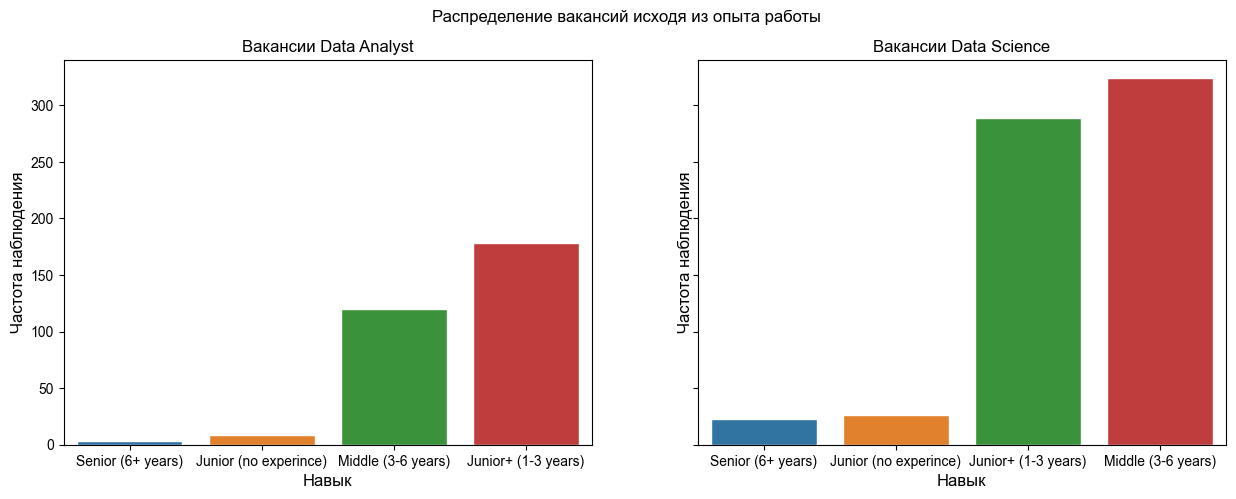

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True) # строим графики
fig.suptitle('Распределение вакансий исходя из опыта работы')
sns.set_style('dark')

# DA
sns.barplot(ax=axes[0], data=da_count, x = 'experience', y = 'id')
axes[0].set_title('Вакансии Data Analyst')
axes[0].set_xlabel('Навык', fontsize=12)
axes[0].set_ylabel('Частота наблюдения', fontsize=12)

# DS
sns.barplot(ax=axes[1], data=ds_count, x = 'experience', y = 'id')
axes[1].set_title('Вакансии Data Science')
axes[1].set_xlabel('Навык', fontsize=12)
axes[1].set_ylabel('Частота наблюдения', fontsize=12)
#plt.savefig('1', bbox_inches="tight")
plt.show()

Среди Data Analyst больше всего вакансий у Junior+, меньше всего у Senior. У Data Science большое количество вакасий в области Junior+ и Middle.

### Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Специалист по Data Science

#### Определим общие Hard Skills среди всех вакансий

In [29]:
skills = data['key_skills_from_key_skills_field'].str.lower().str.split(',', expand=True).stack().str.strip().reset_index(drop=True)
skills = skills.value_counts().head(70).reset_index()

In [30]:
skills.columns = ('skill', 'quantity') # Посмотрим общее количество навыков
skills

,skill,quantity
0,python,415
1,sql,328
2,machine learning,101
3,анализ данных,96
4,data analysis,91
5,ml,81
6,data science,73
7,big data,72
8,pandas,68
9,математическая статистика,67


In [31]:
hard_skills = skills.drop(index=[2, 3, 4, 5, 6, 7, 11, 22, 27, 28, 30, 34, 38, 41, 44, 47, 58, 61]) # уберем навыки, которые можно отнести к категории Soft или дают общее определение

In [32]:
hd = list(hard_skills['skill']) # создадим список для использования в дальнейшем

In [33]:
hard_skills = hard_skills.reset_index(drop=True).head(15)

In [34]:
hard_skills # посмотрим на ТОП-15 навыков

,skill,quantity
0,python,415
1,sql,328
2,pandas,68
3,математическая статистика,67
4,pytorch,54
5,nlp,46
6,power bi,45
7,spark,45
8,numpy,42
9,git,40


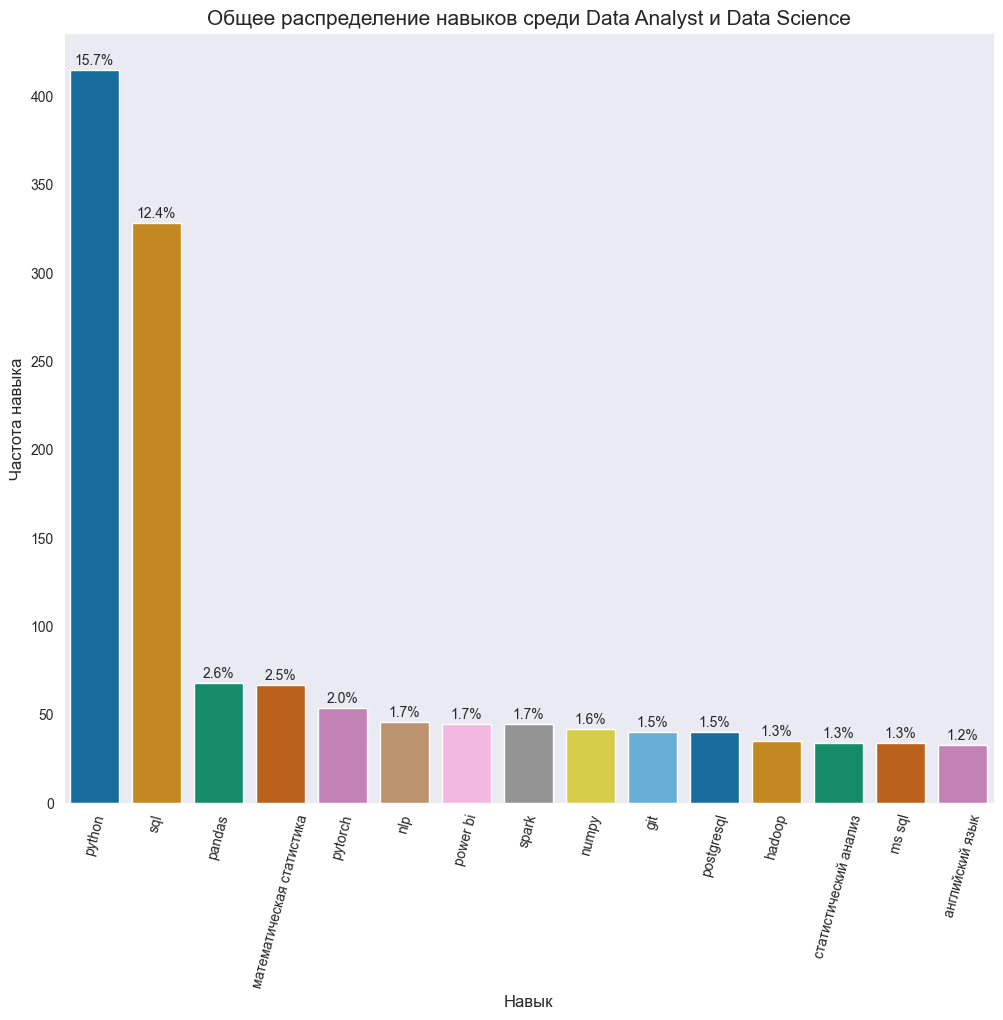

In [35]:
plt.figure(figsize=(12, 10)) #Построим график
sns.set_style('dark')
ax = sns.barplot(data=hard_skills, x='skill', y='quantity', palette='colorblind')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format(height/skills['quantity'].sum()*100),
            ha='center')
plt.xlabel('Навык', fontsize=12)
plt.xticks(rotation=75)
plt.ylabel('Частота навыка', fontsize=12)
plt.title('Общее распределение навыков среди Data Analyst и Data Science', fontsize=15)
plt.show()

#### Hard Skills для Data Analyst и Data Science для категории Junior (no experince) 

Data Analyst Junior

In [36]:
skills_da_jun = data.loc[(data['type'] == 'da') & (data['experience'] == 'Junior (no experince)'),\
'key_skills_from_key_skills_field'].str.lower().str.split(',', expand=True).stack().str.strip().reset_index(drop=True)

In [37]:
skills_da_jun = skills_da_jun.value_counts().reset_index()
skills_da_jun.columns = ('skill', 'quantity')

In [38]:
skills_da_jun = skills_da_jun[skills_da_jun['skill'].isin(hd)]
skills_da_jun = skills_da_jun.head(10).reset_index(drop=True)

In [39]:
skills_da_jun

,skill,quantity
0,python,4
1,sql,4
2,ms excel,1
3,numpy,1
4,airflow,1
5,pandas,1
6,powerbi,1
7,power bi,1
8,sklearn,1
9,apache airflow,1


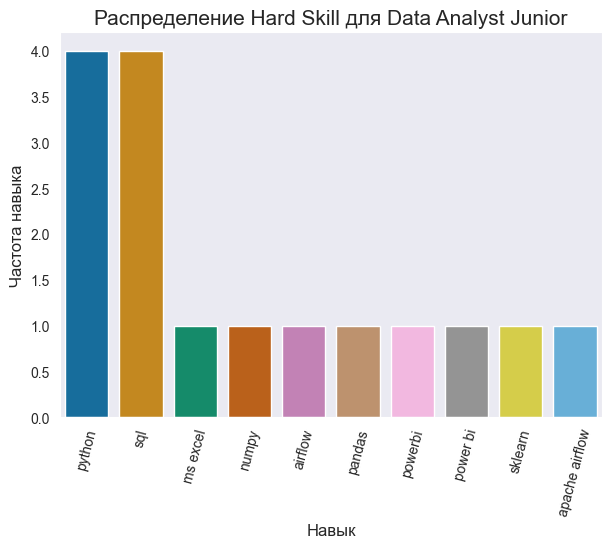

In [40]:
plt.figure(figsize=(7, 5)) #Построим график
ax = sns.barplot(data=skills_da_jun, x='skill', y='quantity', palette='colorblind')
plt.xlabel('Навык', fontsize=12)
plt.xticks(rotation=75)
plt.ylabel('Частота навыка', fontsize=12)
plt.title('Распределение Hard Skill для Data Analyst Junior' , fontsize=15)
plt.show()

Data Science junior

In [41]:
skills_ds_jun = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Junior (no experince)'),\
'key_skills_from_key_skills_field'].str.lower().str.split(',', expand=True).stack().str.strip().reset_index(drop=True)

In [42]:
skills_ds_jun = skills_ds_jun.value_counts().reset_index()
skills_ds_jun.columns = ('skill', 'quantity')

In [43]:
skills_ds_jun = skills_ds_jun[skills_ds_jun['skill'].isin(hd)]
skills_ds_jun = skills_ds_jun.head(10).reset_index(drop=True)
skills_ds_jun

,skill,quantity
0,python,6
1,математическая статистика,3
2,data mining,2
3,spark,1
4,sql,1
5,статистический анализ,1
6,математический анализ,1
7,git,1
8,английский язык,1


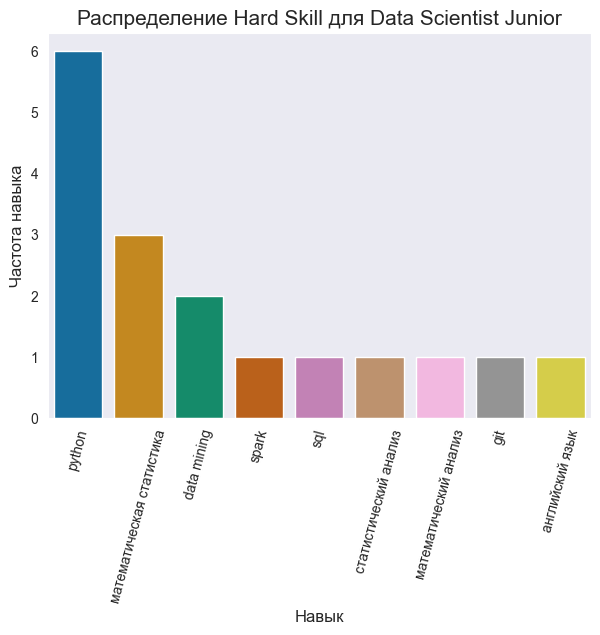

In [44]:
plt.figure(figsize=(7, 5)) #Построим график
ax = sns.barplot(data=skills_ds_jun, x='skill', y='quantity', palette='colorblind')
plt.xlabel('Навык', fontsize=12)
plt.xticks(rotation=75)
plt.ylabel('Частота навыка', fontsize=12)
plt.title('Распределение Hard Skill для Data Scientist Junior' , fontsize=15)
plt.show()

#### Hard Skills для Data Analyst и Data Science для категории Junior +

Data Analyst Junior+

In [45]:
skills_da_jun_plus = data.loc[(data['type'] == 'da') & (data['experience'] == 'Junior+ (1-3 years)'),\
'key_skills_from_key_skills_field'].str.lower().str.split(',', expand=True).stack().str.strip().reset_index(drop=True)

In [46]:
skills_da_jun_plus = skills_da_jun_plus.value_counts().reset_index()
skills_da_jun_plus.columns = ('skill', 'quantity')

In [47]:
skills_da_jun_plus = skills_da_jun_plus[skills_da_jun_plus['skill'].isin(hd)]
skills_da_jun_plus = skills_da_jun_plus.head(10).reset_index(drop=True)
skills_da_jun_plus

,skill,quantity
0,sql,95
1,python,65
2,power bi,23
3,математическая статистика,16
4,ms excel,14
5,tableau,12
6,a/b тесты,10
7,ms sql,10
8,postgresql,9
9,математический анализ,8


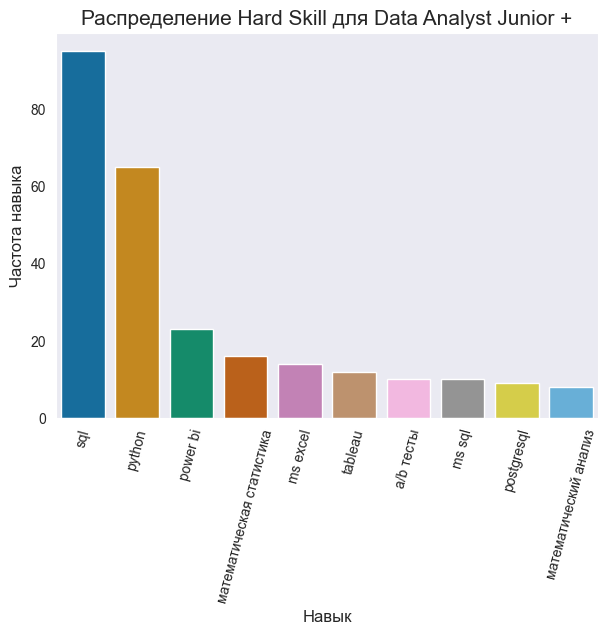

In [48]:
plt.figure(figsize=(7, 5)) #Построим график
ax = sns.barplot(data=skills_da_jun_plus, x='skill', y='quantity', palette='colorblind')
plt.xlabel('Навык', fontsize=12)
plt.xticks(rotation=75)
plt.ylabel('Частота навыка', fontsize=12)
plt.title('Распределение Hard Skill для Data Analyst Junior +' , fontsize=15)
plt.show()

Data Scientist Junior+

In [49]:
skills_ds_jun_plus = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Junior+ (1-3 years)'),\
'key_skills_from_key_skills_field'].str.lower().str.split(',', expand=True).stack().str.strip().reset_index(drop=True)

In [50]:
skills_ds_jun_plus = skills_ds_jun_plus.value_counts().reset_index()
skills_ds_jun_plus.columns = ('skill', 'quantity')

In [51]:
skills_ds_jun_plus = skills_ds_jun_plus[skills_ds_jun_plus['skill'].isin(hd)]
skills_ds_jun_plus = skills_ds_jun_plus.head(10).reset_index(drop=True)
skills_ds_jun_plus

,skill,quantity
0,python,125
1,sql,96
2,pandas,30
3,математическая статистика,25
4,pytorch,23
5,nlp,19
6,математическое моделирование,19
7,numpy,18
8,статистический анализ,17
9,git,15


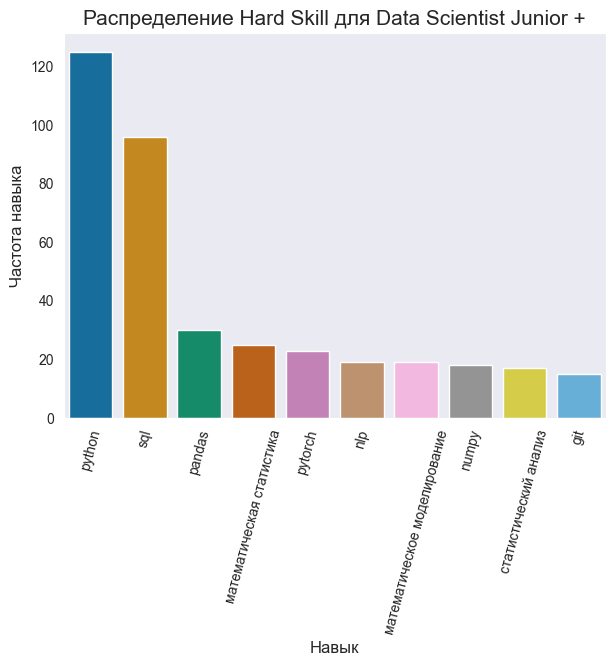

In [52]:
plt.figure(figsize=(7, 5)) #Построим график
ax = sns.barplot(data=skills_ds_jun_plus, x='skill', y='quantity', palette='colorblind')
plt.xlabel('Навык', fontsize=12)
plt.xticks(rotation=75)
plt.ylabel('Частота навыка', fontsize=12)
plt.title('Распределение Hard Skill для Data Scientist Junior +' , fontsize=15)
plt.show()

#### Hard Skills для Data Analyst и Data Science для категории Middle

Data Analyst Middle

In [53]:
skills_da_middle = data.loc[(data['type'] == 'da') & (data['experience'] == 'Middle (3-6 years)'),\
'key_skills_from_key_skills_field'].str.lower().str.split(',', expand=True).stack().str.strip().reset_index(drop=True)

In [54]:
skills_da_middle = skills_da_middle.value_counts().reset_index()
skills_da_middle.columns = ('skill', 'quantity')

In [55]:
skills_da_middle = skills_da_middle[skills_da_middle['skill'].isin(hd)]
skills_da_middle = skills_da_middle.head(10).reset_index(drop=True)
skills_da_middle

,skill,quantity
0,python,53
1,sql,50
2,power bi,14
3,a/b тесты,12
4,postgresql,12
5,tableau,9
6,clickhouse,7
7,pandas,6
8,ms sql,5
9,greenplum,4


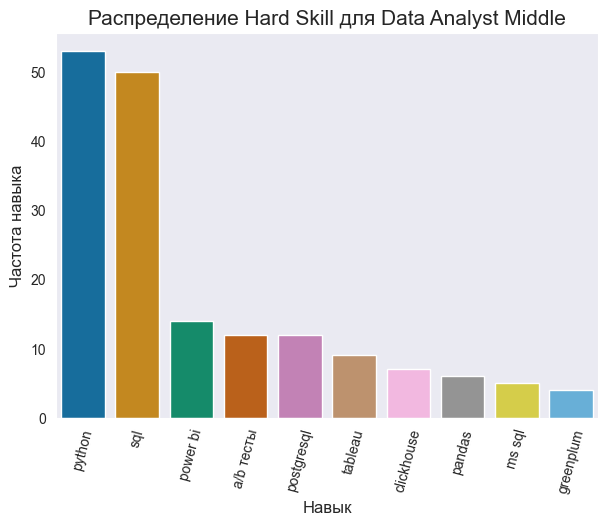

In [56]:
plt.figure(figsize=(7, 5)) #Построим график
ax = sns.barplot(data=skills_da_middle, x='skill', y='quantity', palette='colorblind')
plt.xlabel('Навык', fontsize=12)
plt.xticks(rotation=75)
plt.ylabel('Частота навыка', fontsize=12)
plt.title('Распределение Hard Skill для Data Analyst Middle' , fontsize=15)
plt.show()

Data Science Middle

In [57]:
skills_ds_middle = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Middle (3-6 years)'),\
'key_skills_from_key_skills_field'].str.lower().str.split(',', expand=True).stack().str.strip().reset_index(drop=True)

In [58]:
skills_ds_middle = skills_ds_middle.value_counts().reset_index()
skills_ds_middle.columns = ('skill', 'quantity')

In [59]:
skills_ds_middle = skills_ds_middle[skills_ds_middle['skill'].isin(hd)]
skills_ds_middle = skills_ds_middle.head(10).reset_index(drop=True)
skills_ds_middle

,skill,quantity
0,python,149
1,sql,75
2,pytorch,27
3,nlp,27
4,hadoop,21
5,pandas,21
6,spark,21
7,математическая статистика,20
8,docker,20
9,git,17


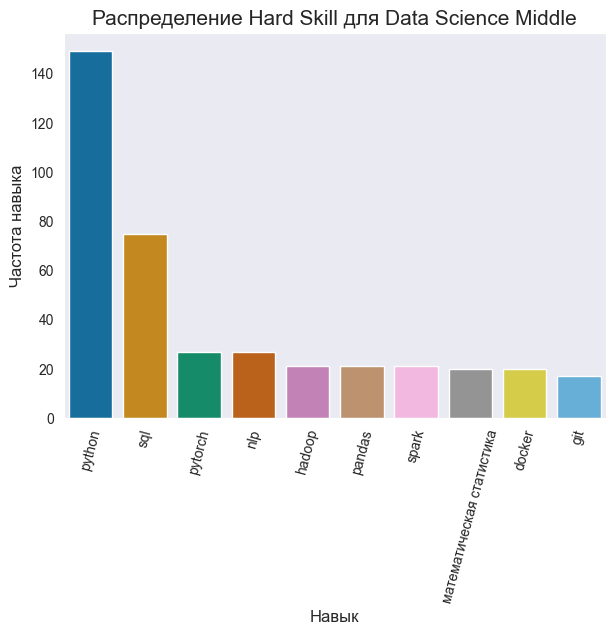

In [60]:
plt.figure(figsize=(7, 5)) #Построим график
ax = sns.barplot(data=skills_ds_middle, x='skill', y='quantity', palette='colorblind')
plt.xlabel('Навык', fontsize=12)
plt.xticks(rotation=75)
plt.ylabel('Частота навыка', fontsize=12)
plt.title('Распределение Hard Skill для Data Science Middle' , fontsize=15)
plt.show()

#### Hard Skills для Data Analyst и Data Science для категории Senior

Data Analyst Senior

In [61]:
skills_da_senior = data.loc[(data['type'] == 'da') & (data['experience'] == 'Senior (6+ years)'),\
'key_skills_from_key_skills_field'].str.lower().str.split(',', expand=True).stack().str.strip().reset_index(drop=True)

In [62]:
skills_da_senior = skills_da_senior.value_counts().reset_index()
skills_da_senior.columns = ('skill', 'quantity')

In [63]:
skills_da_senior = skills_da_senior[skills_da_senior['skill'].isin(hd)]
skills_da_senior = skills_da_senior.reset_index(drop=True)
skills_da_senior

,skill,quantity
0,sql,3
1,python,3
2,tableau,1
3,power bi,1
4,английский язык,1
5,статистика,1
6,статистический анализ,1
7,a/b тесты,1


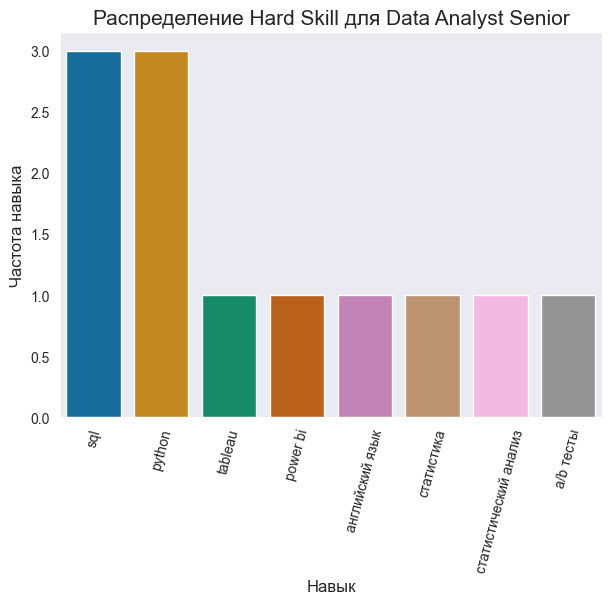

In [64]:
plt.figure(figsize=(7, 5)) #Построим график
sns.set_style('dark')
ax = sns.barplot(data=skills_da_senior, x='skill', y='quantity', palette='colorblind')
plt.xlabel('Навык', fontsize=12)
plt.xticks(rotation=75)
plt.ylabel('Частота навыка', fontsize=12)
plt.title('Распределение Hard Skill для Data Analyst Senior' , fontsize=15)
plt.show()

Data Science Senior

In [65]:
skills_ds_senior = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Senior (6+ years)'),\
'key_skills_from_key_skills_field'].str.lower().str.split(',', expand=True).stack().str.strip().reset_index(drop=True)

In [66]:
skills_ds_senior = skills_ds_senior.value_counts().reset_index()
skills_ds_senior.columns = ('skill', 'quantity')

In [67]:
skills_ds_senior = skills_ds_senior[skills_ds_senior['skill'].isin(hd)]
skills_ds_senior = skills_ds_senior.head(10).reset_index(drop=True)
skills_ds_senior

,skill,quantity
0,python,10
1,sql,4
2,scikit-learn,4
3,pytorch,4
4,английский язык,3
5,tensorflow,3
6,pandas,3
7,spark,2
8,a/b тесты,2
9,opencv,2


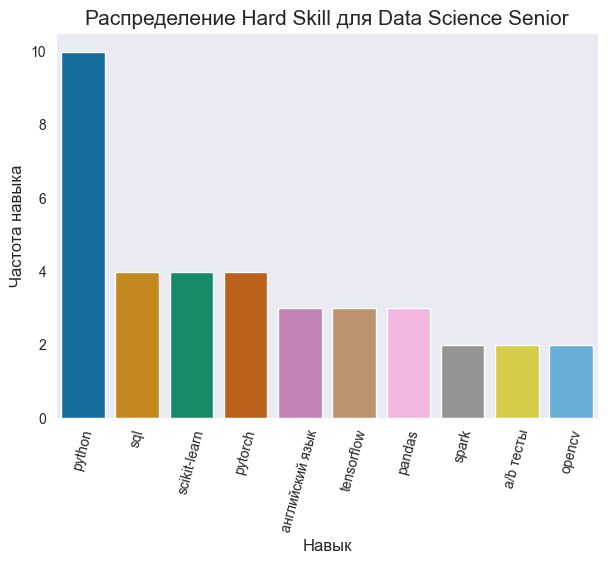

In [68]:
plt.figure(figsize=(7, 5)) #Построим график
sns.set_style('dark')
sns.barplot(data=skills_ds_senior, x='skill', y='quantity', palette='colorblind')
plt.xlabel('Навык', fontsize=12)
plt.xticks(rotation=75)
plt.ylabel('Частота навыка', fontsize=12)
plt.title('Распределение Hard Skill для Data Science Senior' , fontsize=15)
plt.show()

**Вывод:**
- Основными важными навыками в основном для всех категорий Data Analyst и Data Senior является знание SQL и Python. Также необходимо знать статистику.
- Для всех категорий Data Analyst к требованиям добавляется знание Power BI и Tableau. 
- Для Data Science Junior+ и Data Science Middle к требованиям добавляется nlp (Natural Language Processing). Также Data Science Middle и Data Science Senior должны уметь работать с платфоромй Hadoop. Кроме того специалисты Data Science выше Junior должны уметь работать с PyTorch и GIT. 
- Для Data Analyst Senior и Data Science Senior необходимо знать английский язык.
   


#### Soft Skills для Data Analyst и Data Science для категории Junior (no experince) 

In [69]:
# Сгруппируем софт. скиллы для Data Analyst Junior
sft_skills_da_jun = data.loc[(data['type'] == 'da') & (data['experience'] == 'Junior (no experince)'),\
'soft_skills_from_description'].str.lower().str.split(',', expand=True).stack().str.strip().reset_index(drop=True)
sft_da_jun = sft_skills_da_jun.value_counts().reset_index()

In [70]:
# Сгруппируем софт. скиллы для Data Science Junior
sft_skills_ds_jun = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Junior (no experince)'),\
'soft_skills_from_description'].str.lower().str.split(',', expand=True).stack().str.strip().reset_index(drop=True)
sft_ds_jun = sft_skills_ds_jun.value_counts().reset_index()

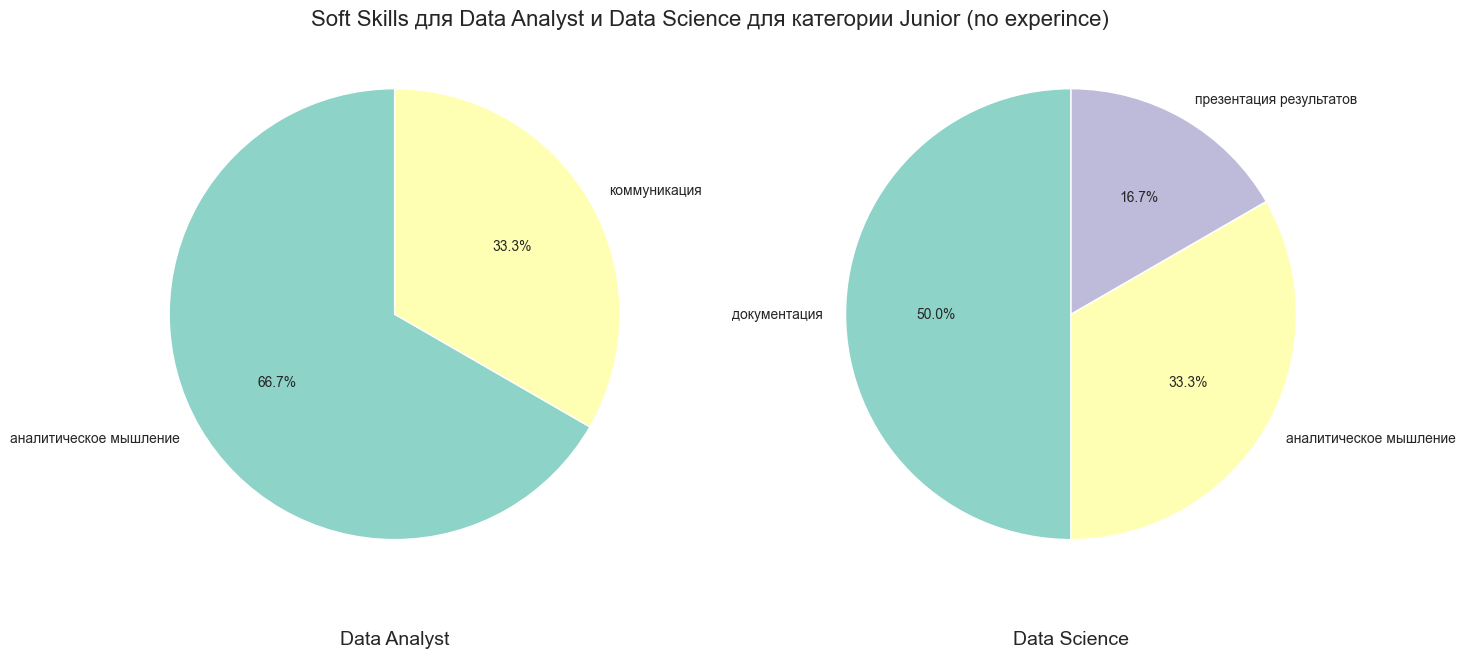

In [71]:
# Построим графики
fig, axes = plt.subplots(1, 2, figsize=(16, 10))
fig.suptitle('Soft Skills для Data Analyst и Data Science для категории Junior (no experince) ', fontsize=16, y = 0.8)
axes[0].pie(x=sft_da_jun[0], labels=sft_da_jun['index'], colors = color, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Data Analyst', fontsize=14, y = -0.1);
axes[1].pie(x=sft_ds_jun[0], labels=sft_ds_jun['index'], colors = color, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Data Science', fontsize=14, y = -0.1);

#### Soft Skills для Data Analyst и Data Science для категории Junior+ 

In [72]:
# Сгруппируем софт. скиллы для Data Analyst Junior +
sft_skills_da_jun_plus = data.loc[(data['type'] == 'da') & (data['experience'] == 'Junior+ (1-3 years)'),\
'soft_skills_from_description'].str.lower().str.split(',', expand=True).stack().str.strip().reset_index(drop=True)
sft_da_jun_plus = sft_skills_da_jun_plus.value_counts().reset_index()

In [73]:
# Сгруппируем софт. скиллы для Data Science Junior +  
sft_skills_ds_jun_plus = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Junior+ (1-3 years)'),\
'soft_skills_from_description'].str.lower().str.split(',', expand=True).stack().str.strip().reset_index(drop=True)
sft_ds_jun_plus = sft_skills_ds_jun_plus.value_counts().reset_index()

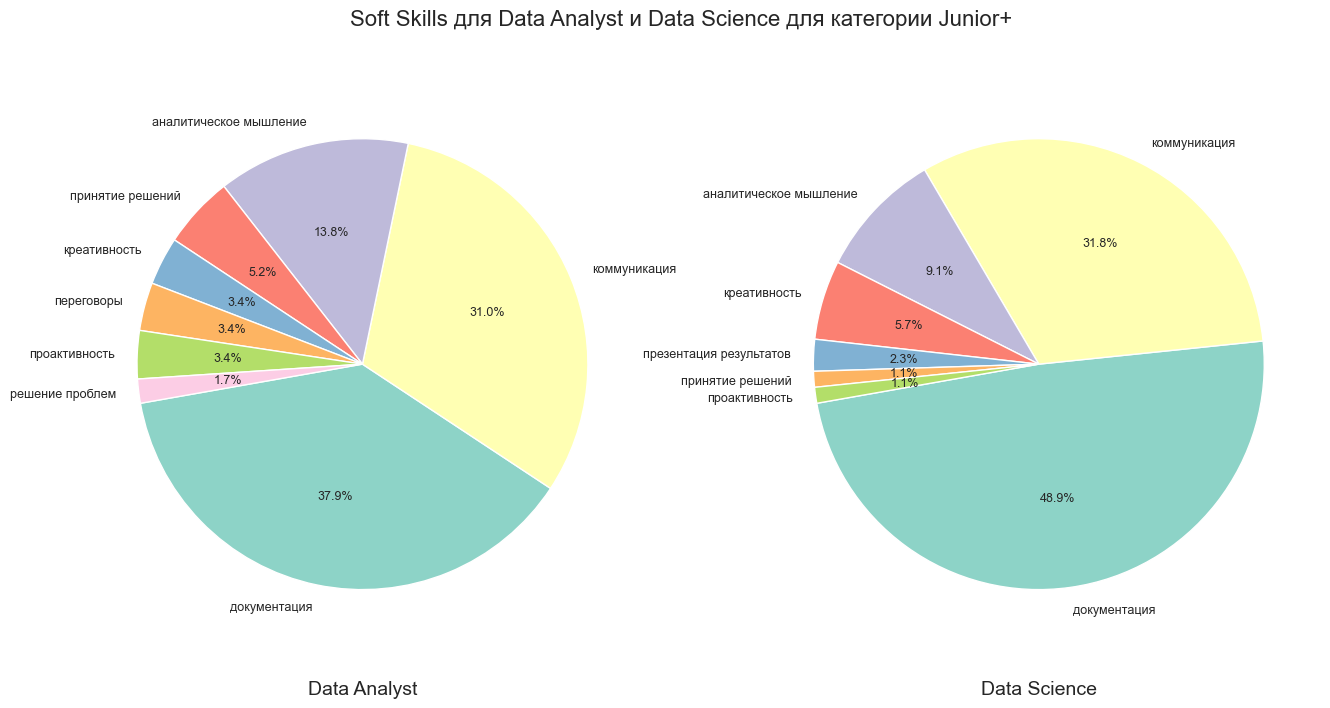

In [74]:
# Построим графики
fig, axes = plt.subplots(1, 2, figsize=(16, 10))
fig.suptitle('Soft Skills для Data Analyst и Data Science для категории Junior+', fontsize=16, y = 0.85)
axes[0].pie(x=sft_da_jun_plus[0], labels=sft_da_jun_plus['index'], colors = color, autopct='%1.1f%%', textprops={'fontsize':9}, startangle=190)
axes[0].set_title('Data Analyst', fontsize=14, y = -0.1);
axes[1].pie(x=sft_ds_jun_plus[0], labels=sft_ds_jun_plus['index'], colors = color, autopct='%1.1f%%', textprops={'fontsize':9},startangle=190)
axes[1].set_title('Data Science', fontsize=14, y = -0.1);

#### Soft Skills для Data Analyst и Data Science для категории Middle 

In [75]:
# Сгруппируем софт. скиллы для Data Analyst Middle
sft_skills_da_middle = data.loc[(data['type'] == 'da') & (data['experience'] == 'Middle (3-6 years)'),\
'soft_skills_from_description'].str.lower().str.split(',', expand=True).stack().str.strip().reset_index(drop=True)
sft_da_middle = sft_skills_da_middle.value_counts().reset_index()

In [76]:
# Сгруппируем софт. скиллы для Data Science Middle  
sft_skills_ds_middle = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Middle (3-6 years)'),\
'soft_skills_from_description'].str.lower().str.split(',', expand=True).stack().str.strip().reset_index(drop=True)
sft_ds_middle = sft_skills_ds_middle.value_counts().reset_index()

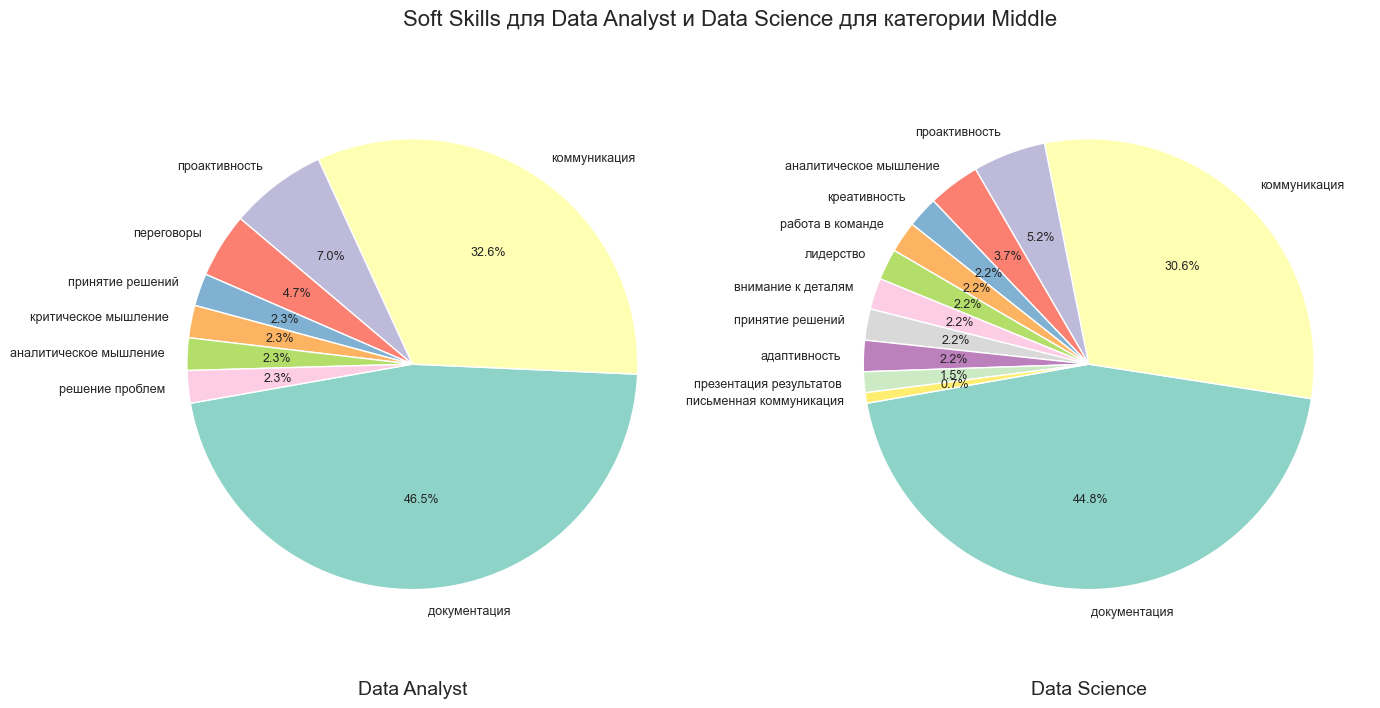

In [77]:
# Построим графики
fig, axes = plt.subplots(1, 2, figsize=(16, 10))
fig.suptitle('Soft Skills для Data Analyst и Data Science для категории Middle', fontsize=16, y = 0.85)
axes[0].pie(x=sft_da_middle[0], labels=sft_da_middle['index'], colors = color, autopct='%1.1f%%', textprops={'fontsize':9}, startangle=190)
axes[0].set_title('Data Analyst', fontsize=14, y = -0.1);
axes[1].pie(x=sft_ds_middle[0], labels=sft_ds_middle['index'], colors = color, autopct='%1.1f%%', textprops={'fontsize':9},startangle=190)
axes[1].set_title('Data Science', fontsize=14, y = -0.1);

#### Soft Skills для Data Analyst и Data Science для категории Senior

In [78]:
# Сгруппируем софт. скиллы для Data Analyst Senior
sft_skills_da_senior = data.loc[(data['type'] == 'da') & (data['experience'] == 'Senior (6+ years)'),\
'soft_skills_from_description'].str.lower().str.split(',', expand=True).stack().str.strip().reset_index(drop=True)
sft_da_senior = sft_skills_da_senior.value_counts().reset_index()

In [79]:
# Сгруппируем софт. скиллы для Data Science Senior  
sft_skills_ds_senior = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Senior (6+ years)'),\
'soft_skills_from_description'].str.lower().str.split(',', expand=True).stack().str.strip().reset_index(drop=True)
sft_ds_senior = sft_skills_ds_senior.value_counts().reset_index()

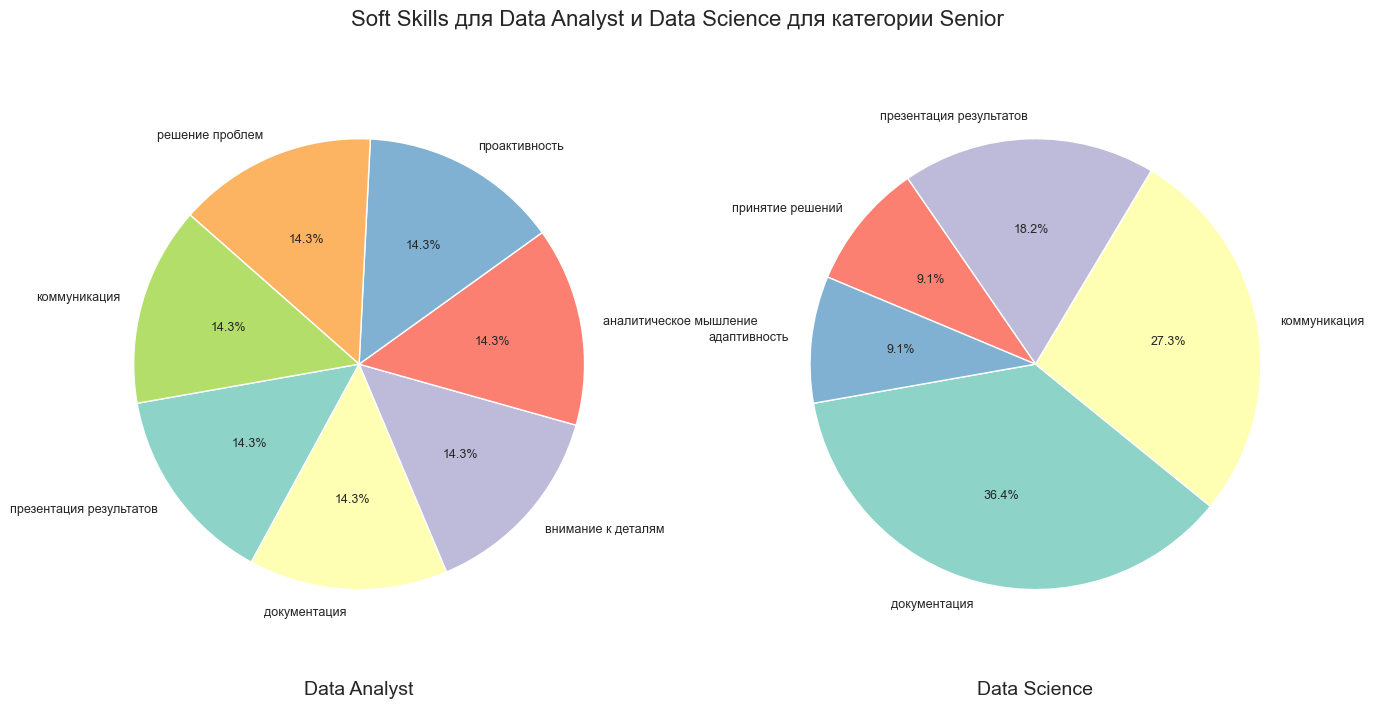

In [80]:
# Построим графики
fig, axes = plt.subplots(1, 2, figsize=(16, 10))
fig.suptitle('Soft Skills для Data Analyst и Data Science для категории Senior', fontsize=16, y = 0.85)
axes[0].pie(x=sft_da_senior[0], labels=sft_da_senior['index'], colors = color, autopct='%1.1f%%', textprops={'fontsize':9}, startangle=190)
axes[0].set_title('Data Analyst', fontsize=14, y = -0.1);
axes[1].pie(x=sft_ds_senior[0], labels=sft_ds_senior['index'], colors = color, autopct='%1.1f%%', textprops={'fontsize':9},startangle=190)
axes[1].set_title('Data Science', fontsize=14, y = -0.1);

**Вывод**
- у Data Analyst Junior и Data Science категории Junior и Junior+ самыми важными Soft навыками являются в основном коммуникация и аналитическое мышление. У Data Science Junior к этим двум навыкам добавляется презентация результатов;
- далее у всех категорий  основными навыками являются в основном коммуникация и документация (работа с документами).

### Определение типичного места работы для Аналитика данных и специалист по Data Science

#### ТОП-10 компаний

In [81]:
# Определим ТОП-10 компаний исходя из опыта работы по каждой категории
da_1 = data.loc[(data['type'] == 'da') & (data['experience'] == 'Junior (no experince)'), 'employer'].value_counts().reset_index().head(10)
ds_1 = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Junior (no experince)'), 'employer'].value_counts().reset_index().head(10)
da_2 = data.loc[(data['type'] == 'da') & (data['experience'] == 'Junior+ (1-3 years)'), 'employer'].value_counts().reset_index().head(10)
ds_2 = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Junior+ (1-3 years)'), 'employer'].value_counts().reset_index().head(10)
da_3 = data.loc[(data['type'] == 'da') & (data['experience'] == 'Middle (3-6 years)'), 'employer'].value_counts().reset_index().head(10)
ds_3 = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Middle (3-6 years)'), 'employer'].value_counts().reset_index().head(10)
da_4 = data.loc[(data['type'] == 'da') & (data['experience'] == 'Senior (6+ years)'), 'employer'].value_counts().reset_index().head(10)
ds_4 = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Senior (6+ years)'), 'employer'].value_counts().reset_index().head(10)

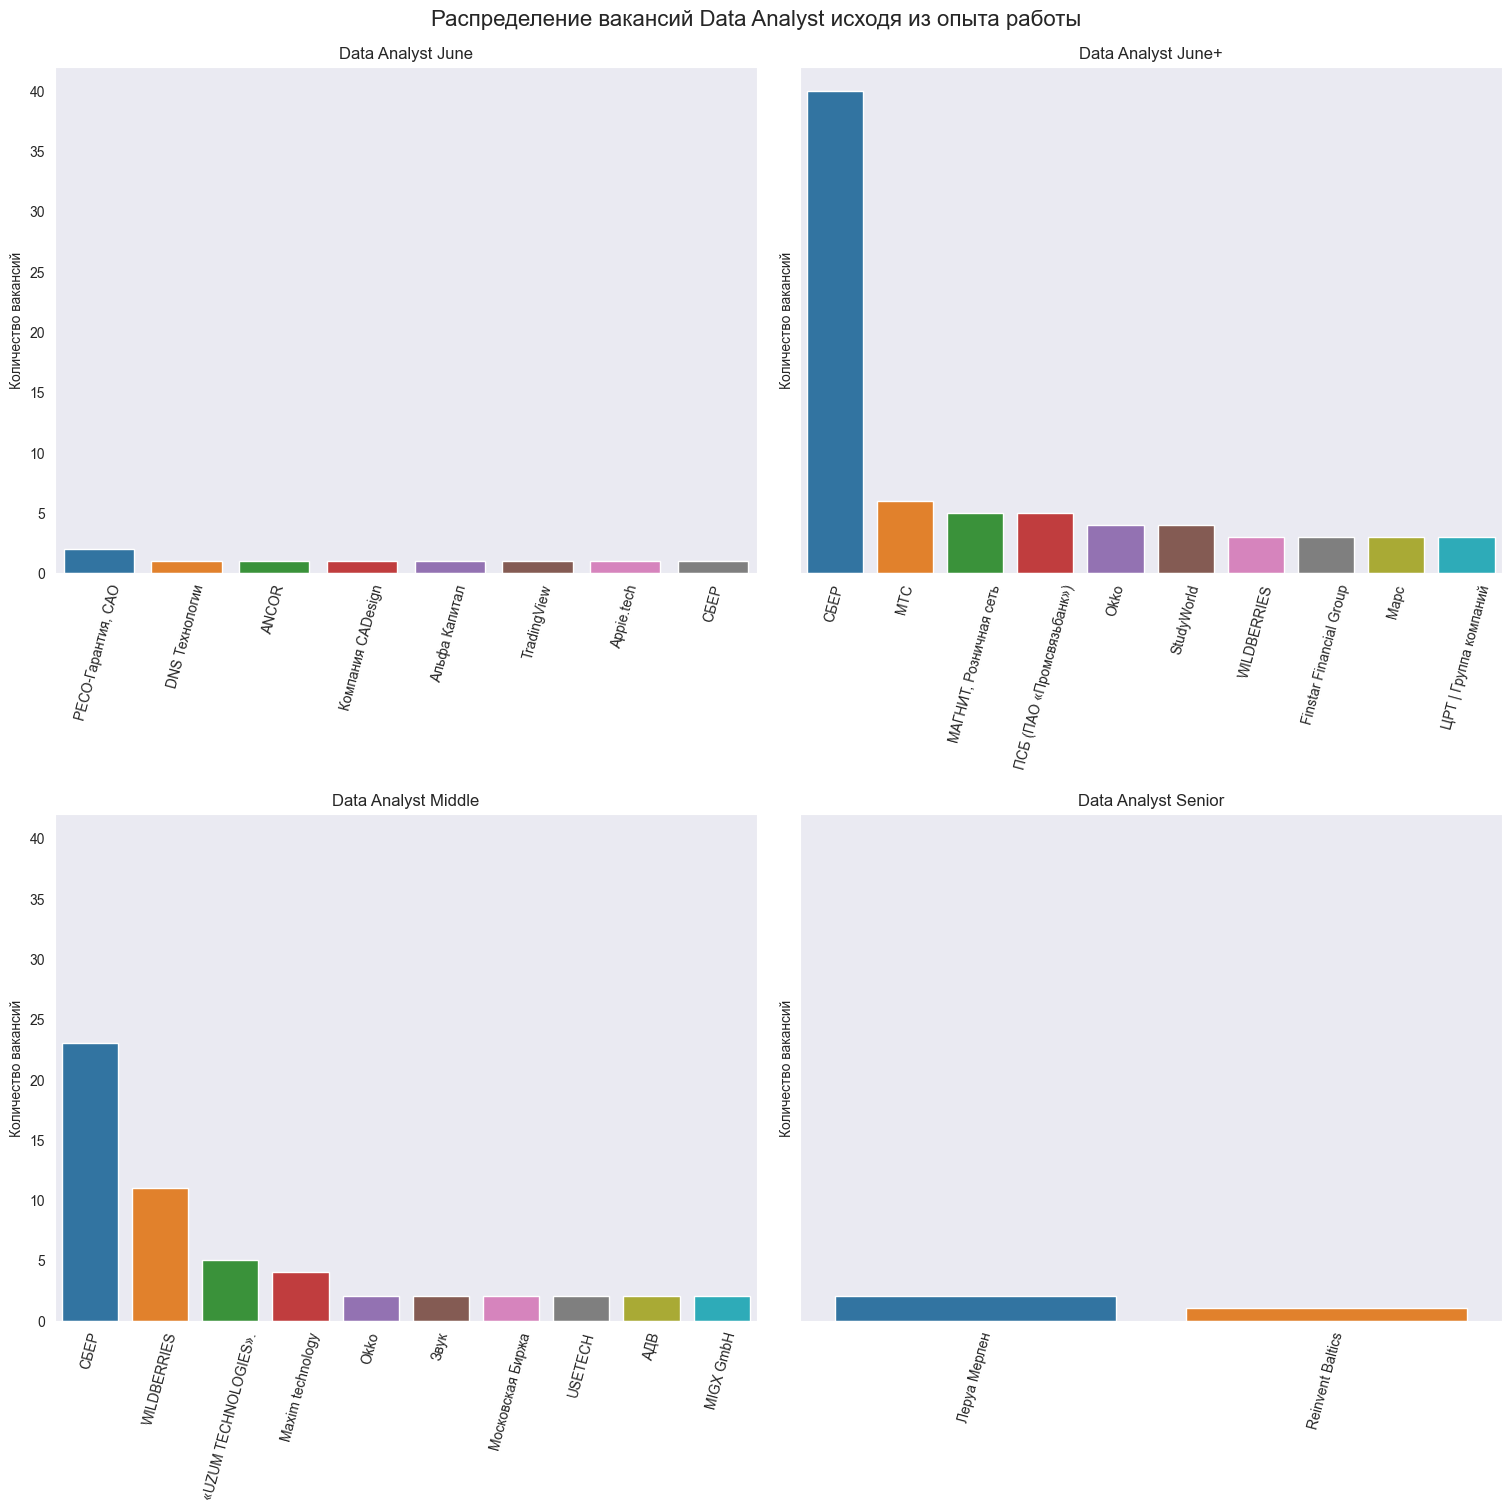

In [82]:
fig, axes = plt.subplots(2, 2, figsize=(15,15), sharey=True, constrained_layout=True) # строим графики
fig.suptitle('Распределение вакансий Data Analyst исходя из опыта работы', fontsize=16)
sns.set_style('dark')
#fig.tight_layout(h_pad= 15)

sns.barplot(ax=axes[0, 0], data=da_1, x = 'index', y = 'employer')
axes[0, 0].set_title('Data Analyst June')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Количество вакансий', fontsize=10)
axes[0, 0].tick_params(axis='x', labelsize=10, rotation = 75)

sns.barplot(ax=axes[0, 1], data=da_2, x = 'index', y = 'employer')
axes[0, 1].set_title('Data Analyst June+')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Количество вакансий', fontsize=10)
axes[0, 1].tick_params(axis='x', labelsize=10, rotation = 75)

sns.barplot(ax=axes[1, 0], data=da_3, x = 'index', y = 'employer')
axes[1, 0].set_title('Data Analyst Middle')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Количество вакансий', fontsize=10)
axes[1, 0].tick_params(axis='x', labelsize=10, rotation = 75)

sns.barplot(ax=axes[1, 1], data=da_4, x = 'index', y = 'employer')
axes[1, 1].set_title('Data Analyst Senior')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Количество вакансий', fontsize=10)
axes[1, 1].tick_params(axis='x', labelsize=10, rotation = 75)

plt.show()

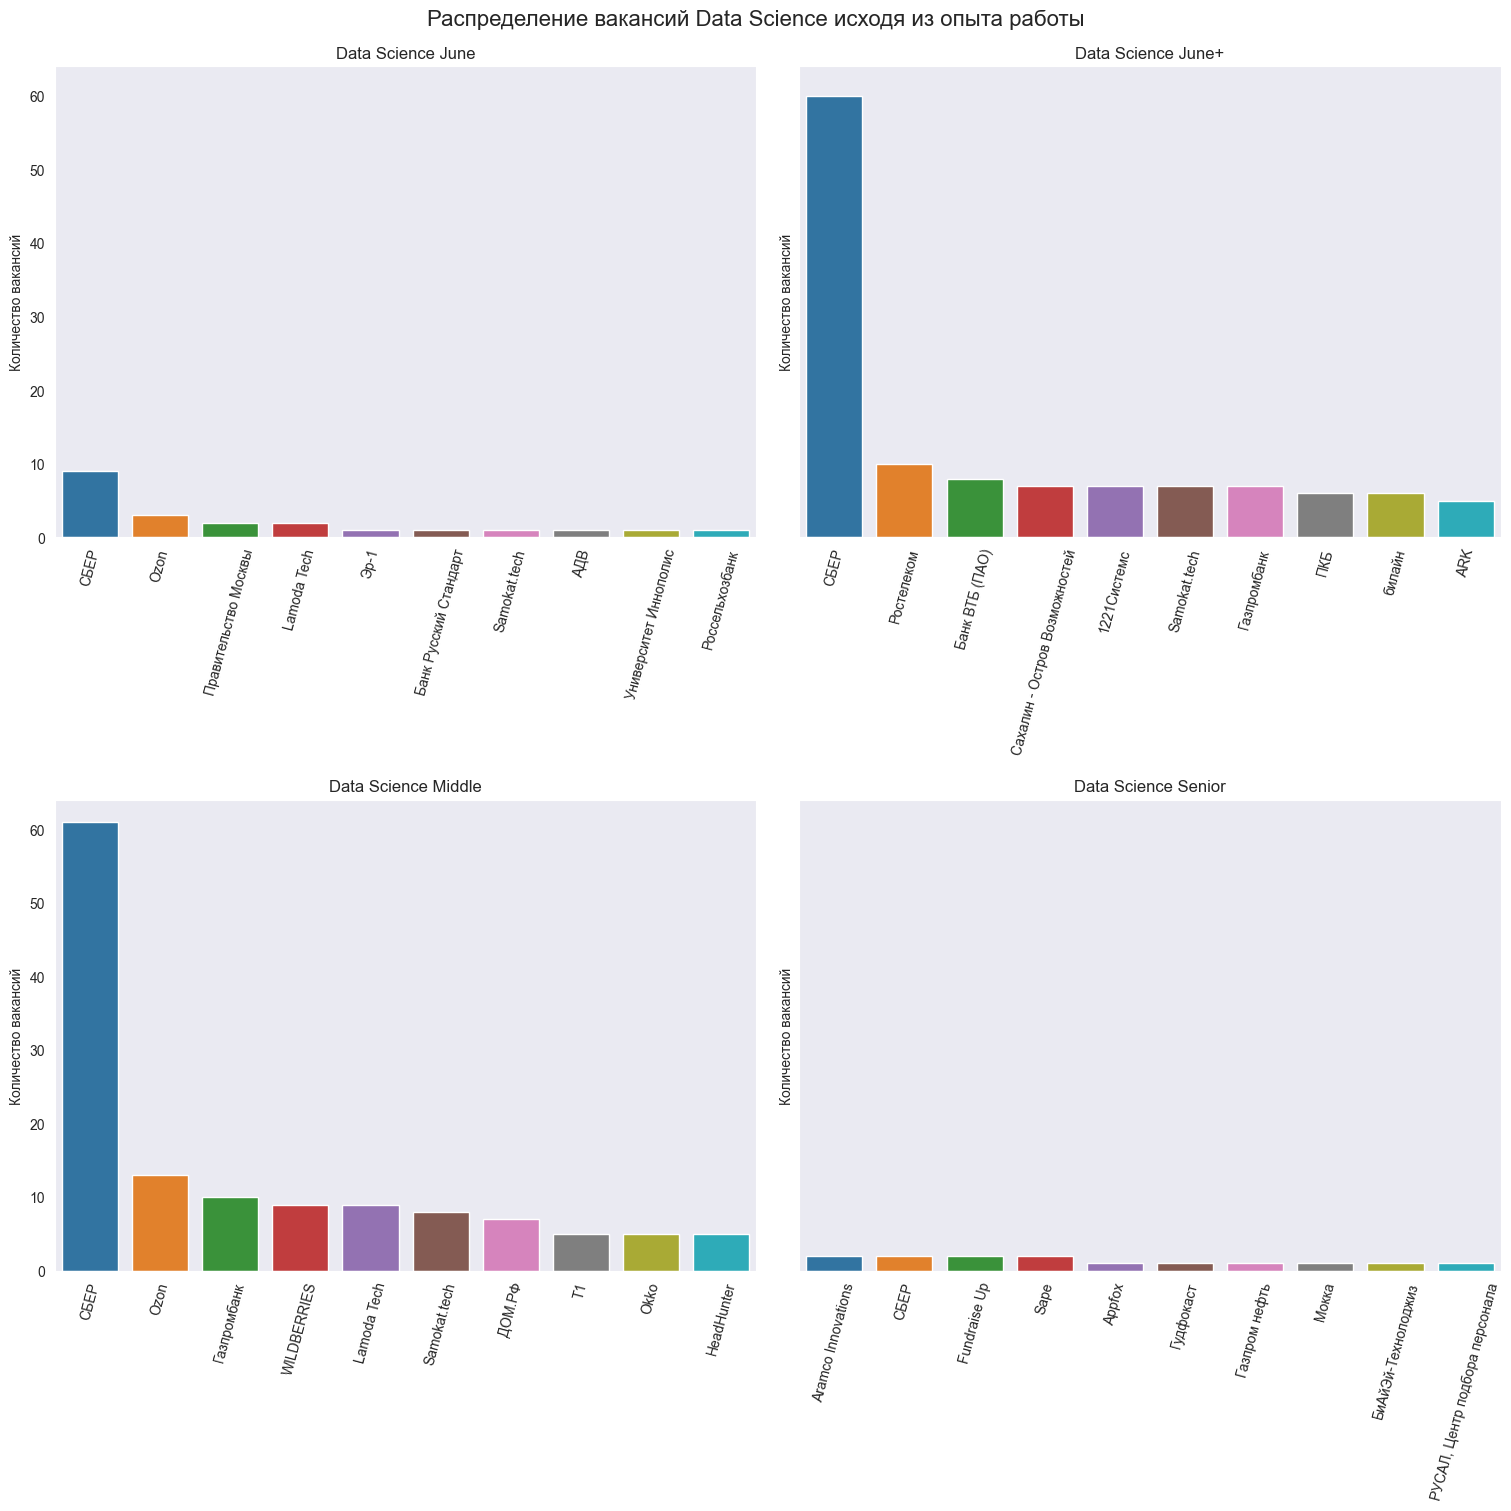

In [83]:
fig, axes = plt.subplots(2, 2, figsize=(15,15), sharey=True, constrained_layout=True) # строим графики
fig.suptitle('Распределение вакансий Data Science исходя из опыта работы', fontsize=16)
sns.set_style('dark')
#fig.tight_layout(h_pad= 15)

sns.barplot(ax=axes[0, 0], data=ds_1, x = 'index', y = 'employer')
axes[0, 0].set_title('Data Science June')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Количество вакансий', fontsize=10)
axes[0, 0].tick_params(axis='x', labelsize=10, rotation = 75)

sns.barplot(ax=axes[0, 1], data=ds_2, x = 'index', y = 'employer')
axes[0, 1].set_title('Data Science June+')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Количество вакансий', fontsize=10)
axes[0, 1].tick_params(axis='x', labelsize=10, rotation = 75)

sns.barplot(ax=axes[1, 0], data=ds_3, x = 'index', y = 'employer')
axes[1, 0].set_title('Data Science Middle')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Количество вакансий', fontsize=10)
axes[1, 0].tick_params(axis='x', labelsize=10, rotation = 75)

sns.barplot(ax=axes[1, 1], data=ds_4, x = 'index', y = 'employer')
axes[1, 1].set_title('Data Science Senior')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Количество вакансий', fontsize=10)
axes[1, 1].tick_params(axis='x', labelsize=10, rotation = 75)

plt.show()

**Вывод:**
- У позиции Data Analyst с опытом June+ и Middle больше всего вакансий у Сбера. 
- У позиции Data Science также больше всего вакансий у Сбера среди категорий June, June+ и Middle.
- Также по количеству вакансий на позицию Data Analyst June+ следом идут такие компании как МТС, ПСБ и Магнит.
- По количеству вакансий на позицию Data Analyst Middle после Сбера идут Wildberries. На позицию Data Senior набирают две компании: Леруа Мерлен (на 1 месте) и Reinvent Baltics.
- На позицию Data Science June и Data Science Middle по количеству вакансий после Сбера идеть Ozon. На позицию Data Science Senior больше всего набирают Fundraise UP, Sape, Aramco Innoivations и СБЕР. 

#### Уровень зарплаты

In [84]:
#Определим уровни зарплат исходя из опыта работы
dam_1 = data.loc[(data['type'] == 'da') & (data['experience'] == 'Junior (no experince)')].groupby('salary_bin')['id'].count().sort_values().reset_index()
dam_2 = data.loc[(data['type'] == 'da') & (data['experience'] == 'Junior+ (1-3 years)')].groupby('salary_bin')['id'].count().sort_values().reset_index()
dam_3 = data.loc[(data['type'] == 'da') & (data['experience'] == 'Middle (3-6 years)')].groupby('salary_bin')['id'].count().sort_values().reset_index()
dam_4 = data.loc[(data['type'] == 'da') & (data['experience'] == 'Senior (6+ years)')].groupby('salary_bin')['id'].count().sort_values().reset_index()
dsm_1 = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Junior (no experince)')].groupby('salary_bin')['id'].count().sort_values().reset_index()
dsm_2 = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Junior+ (1-3 years)')].groupby('salary_bin')['id'].count().sort_values().reset_index()
dsm_3 = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Middle (3-6 years)')].groupby('salary_bin')['id'].count().sort_values().reset_index()
dsm_4 = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Senior (6+ years)')].groupby('salary_bin')['id'].count().sort_values().reset_index()


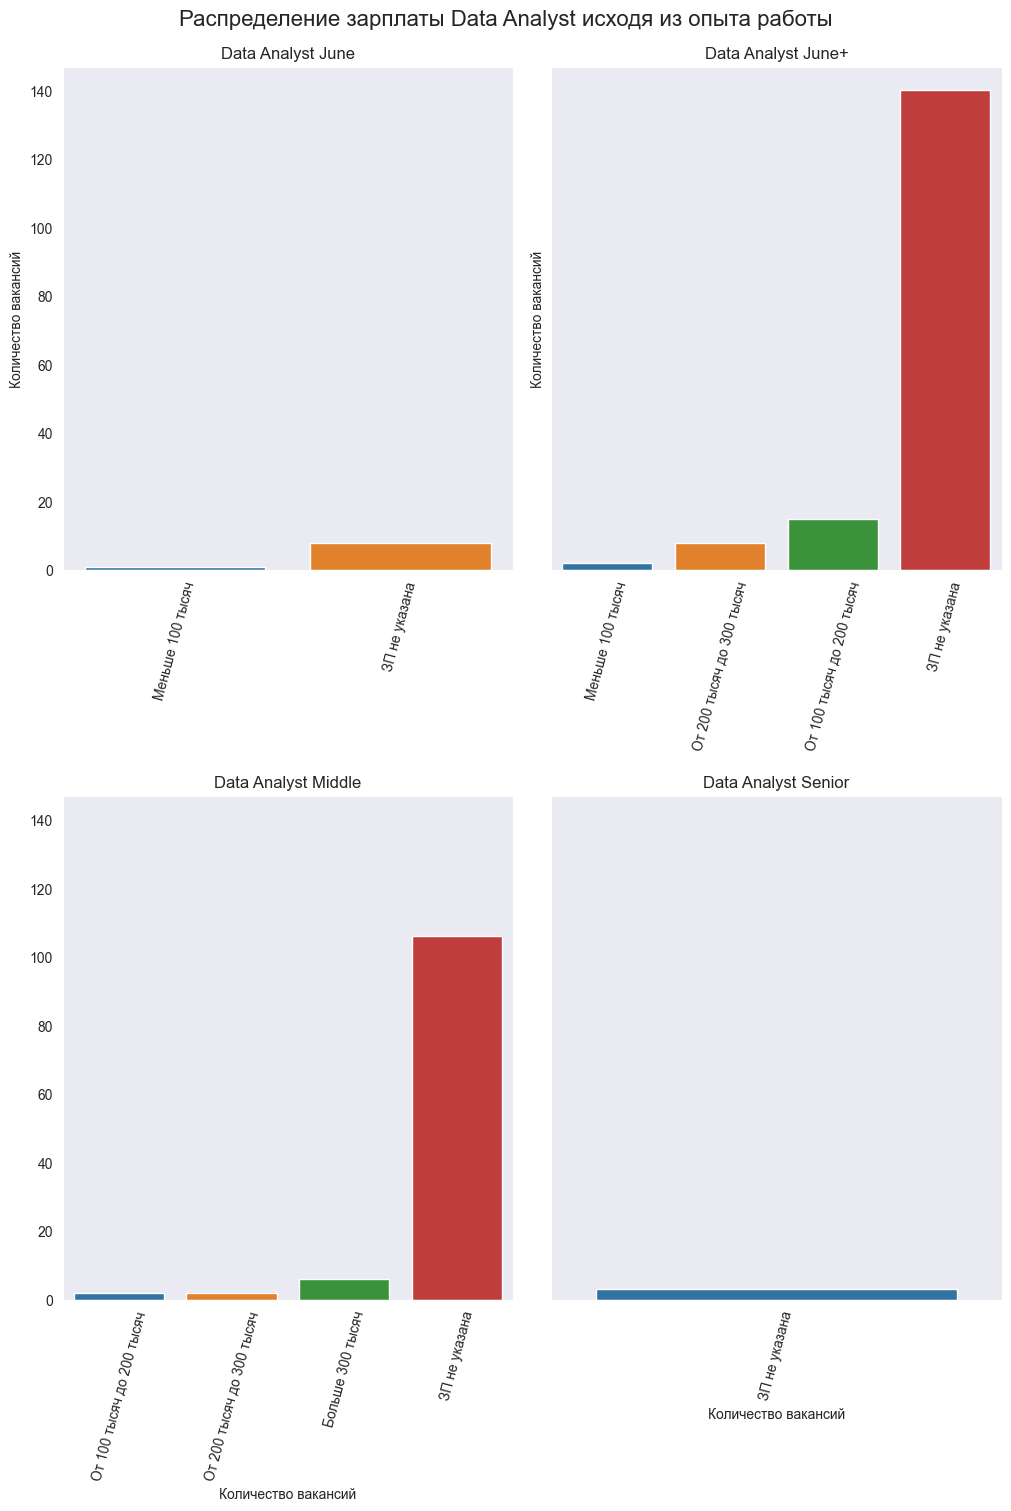

In [85]:
#Построим графики для DA
fig, axes = plt.subplots(2, 2, figsize=(10,15), sharey=True, constrained_layout=True) # строим графики
fig.suptitle('Распределение зарплаты Data Analyst исходя из опыта работы', fontsize=16)
sns.set_style('dark')
#fig.tight_layout(h_pad= 15)

sns.barplot(ax=axes[0, 0], data=dam_1, x = 'salary_bin', y = 'id')
axes[0, 0].set_title('Data Analyst June')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Количество вакансий', fontsize=10)
axes[0, 0].tick_params(axis='x', labelsize=10, rotation = 75)

sns.barplot(ax=axes[0, 1], data=dam_2, x = 'salary_bin', y = 'id')
axes[0, 1].set_title('Data Analyst June+')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Количество вакансий', fontsize=10)
axes[0, 1].tick_params(axis='x', labelsize=10, rotation = 75)

sns.barplot(ax=axes[1, 0], data=dam_3, x = 'salary_bin', y = 'id')
axes[1, 0].set_title('Data Analyst Middle')
axes[1, 0].set_xlabel('Количество вакансий')
axes[1, 0].set_ylabel('', fontsize=10)
axes[1, 0].tick_params(axis='x', labelsize=10, rotation = 75)

sns.barplot(ax=axes[1, 1], data=dam_4, x = 'salary_bin', y = 'id')
axes[1, 1].set_title('Data Analyst Senior')
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlabel('Количество вакансий', fontsize=10)
axes[1, 1].tick_params(axis='x', labelsize=10, rotation = 75)

plt.show()

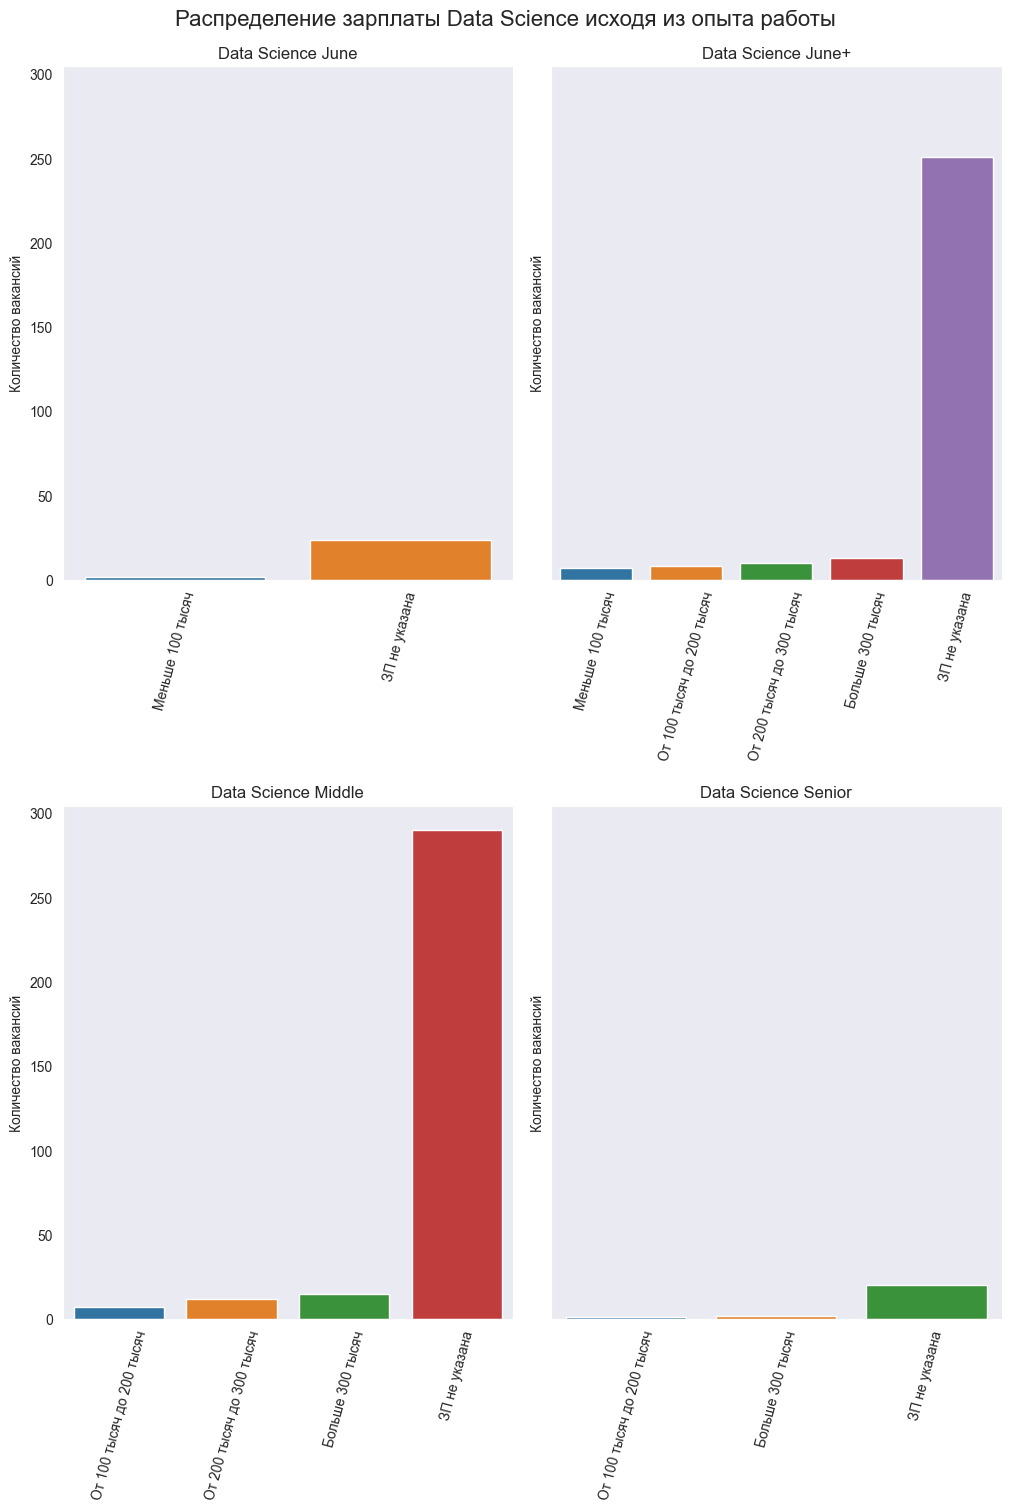

In [86]:
#Построим графики для DS
fig, axes = plt.subplots(2, 2, figsize=(10,15), sharey=True, constrained_layout=True) # строим графики
fig.suptitle('Распределение зарплаты Data Science исходя из опыта работы', fontsize=16)
sns.set_style('dark')
#fig.tight_layout(h_pad= 15)

sns.barplot(ax=axes[0, 0], data=dsm_1, x = 'salary_bin', y = 'id')
axes[0, 0].set_title('Data Science June')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Количество вакансий', fontsize=10)
axes[0, 0].tick_params(axis='x', labelsize=10, rotation = 75)

sns.barplot(ax=axes[0, 1], data=dsm_2, x = 'salary_bin', y = 'id')
axes[0, 1].set_title('Data Science June+')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('Количество вакансий', fontsize=10)
axes[0, 1].tick_params(axis='x', labelsize=10, rotation = 75)

sns.barplot(ax=axes[1, 0], data=dsm_3, x = 'salary_bin', y = 'id')
axes[1, 0].set_title('Data Science Middle')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Количество вакансий', fontsize=10)
axes[1, 0].tick_params(axis='x', labelsize=10, rotation = 75)

sns.barplot(ax=axes[1, 1], data=dsm_4, x = 'salary_bin', y = 'id')
axes[1, 1].set_title('Data Science Senior')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Количество вакансий', fontsize=10)
axes[1, 1].tick_params(axis='x', labelsize=10, rotation = 75)

plt.show()

**Вывод:**
Как видно из графиков большая часть данных по зарплате отсутствует, в связи с чем вывод можно составить только условный. В категории Data Science June и Data Analyst June уровень зарплат составляет менее 100 тыс. рублей. В категории Data Analyst June+ большая часть предложений попадает в категорию от 100 до 200 тыс. рублей. В разделе Data Analyst Middle в среднем зарплаты идут от  200 тысяч. В то же время разделе Data Science June+ зарплаты в среднем от 100 тыс. рублей и имеются предложения в категории от 200 до 300 тыс. рублей. В разделе Data Scieence Middle зарплаты в среднем от 200 тыс. рублей. В разделе Data Science Senior есть предложения больше 300 тысяч рублей.   


#### График работы

In [87]:
data['experience'].unique()

array(['Middle (3-6 years)', 'Junior+ (1-3 years)', 'Senior (6+ years)',
       'Junior (no experince)'], dtype=object)

In [88]:
# Определим графики работы исходя из опыта работы
dasc_1 = data.loc[(data['type'] == 'da') & (data['experience'] == 'Junior (no experince)'), 'schedule'].value_counts().reset_index()
dasc_2 = data.loc[(data['type'] == 'da') & (data['experience'] == 'Junior+ (1-3 years)'), 'schedule'].value_counts().reset_index()
dasc_3 = data.loc[(data['type'] == 'da') & (data['experience'] == 'Middle (3-6 years)'), 'schedule'].value_counts().reset_index()
dasc_4 = data.loc[(data['type'] == 'da') & (data['experience'] == 'Senior (6+ years)'), 'schedule'].value_counts().reset_index()
dssc_1 = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Junior (no experince)'), 'schedule'].value_counts().reset_index()
dssc_2 = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Junior+ (1-3 years)'), 'schedule'].value_counts().reset_index()
dssc_3 = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Middle (3-6 years)'), 'schedule'].value_counts().reset_index()
dssc_4 = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Senior (6+ years)'), 'schedule'].value_counts().reset_index()

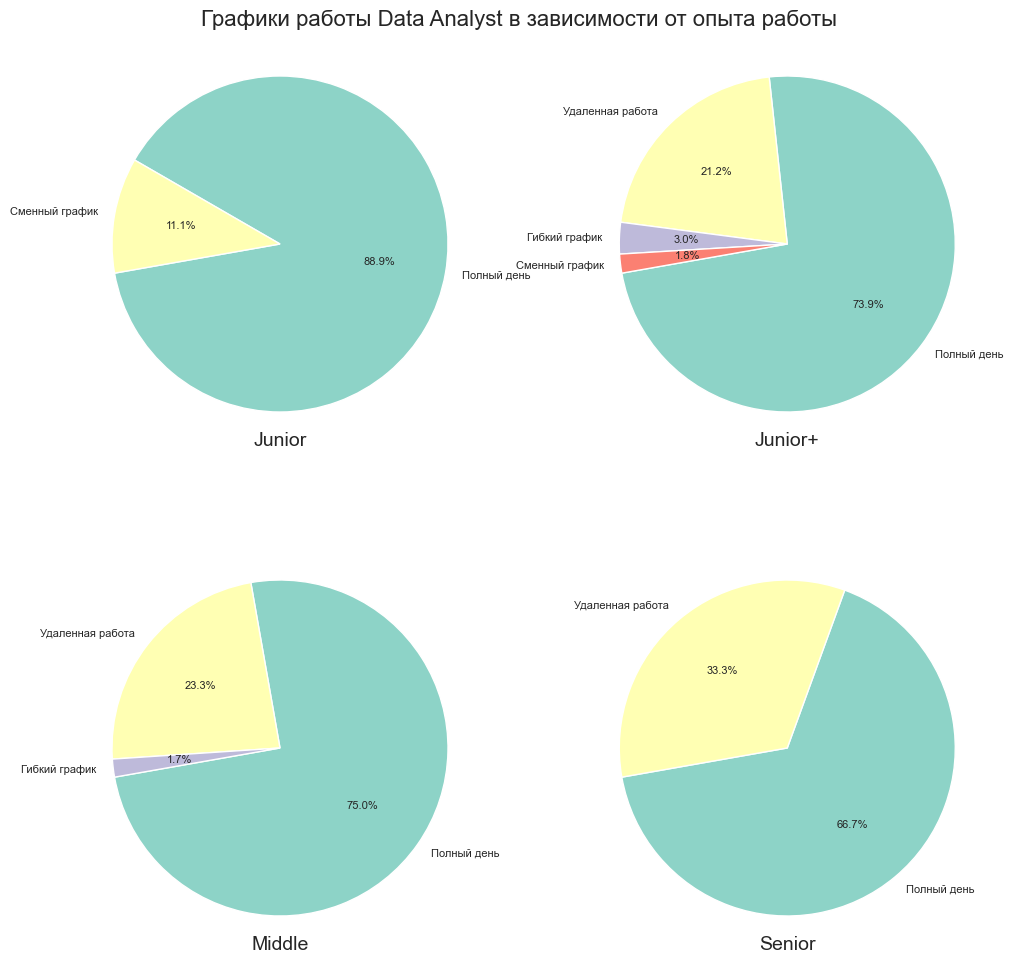

In [89]:
# Построим графики
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Графики работы Data Analyst в зависимости от опыта работы', fontsize=16, y = 0.9)
axes[0, 0].pie(x=dasc_1['schedule'], labels=dasc_1['index'], colors = color, autopct='%1.1f%%', textprops={'fontsize':8}, startangle=190)
axes[0, 0].set_title('Junior', fontsize=14, y = 0);
axes[0, 1].pie(x=dasc_2['schedule'], labels=dasc_2['index'], colors = color, autopct='%1.1f%%', textprops={'fontsize':8},startangle=190)
axes[0, 1].set_title('Junior+', fontsize=14, y = 0);
axes[1, 0].pie(x=dasc_3['schedule'], labels=dasc_3['index'], colors = color, autopct='%1.1f%%', textprops={'fontsize':8}, startangle=190)
axes[1, 0].set_title('Middle', fontsize=14, y = 0);
axes[1, 1].pie(x=dasc_4['schedule'], labels=dasc_4['index'], colors = color, autopct='%1.1f%%', textprops={'fontsize':8},startangle=190)
axes[1, 1].set_title('Senior', fontsize=14, y = 0);

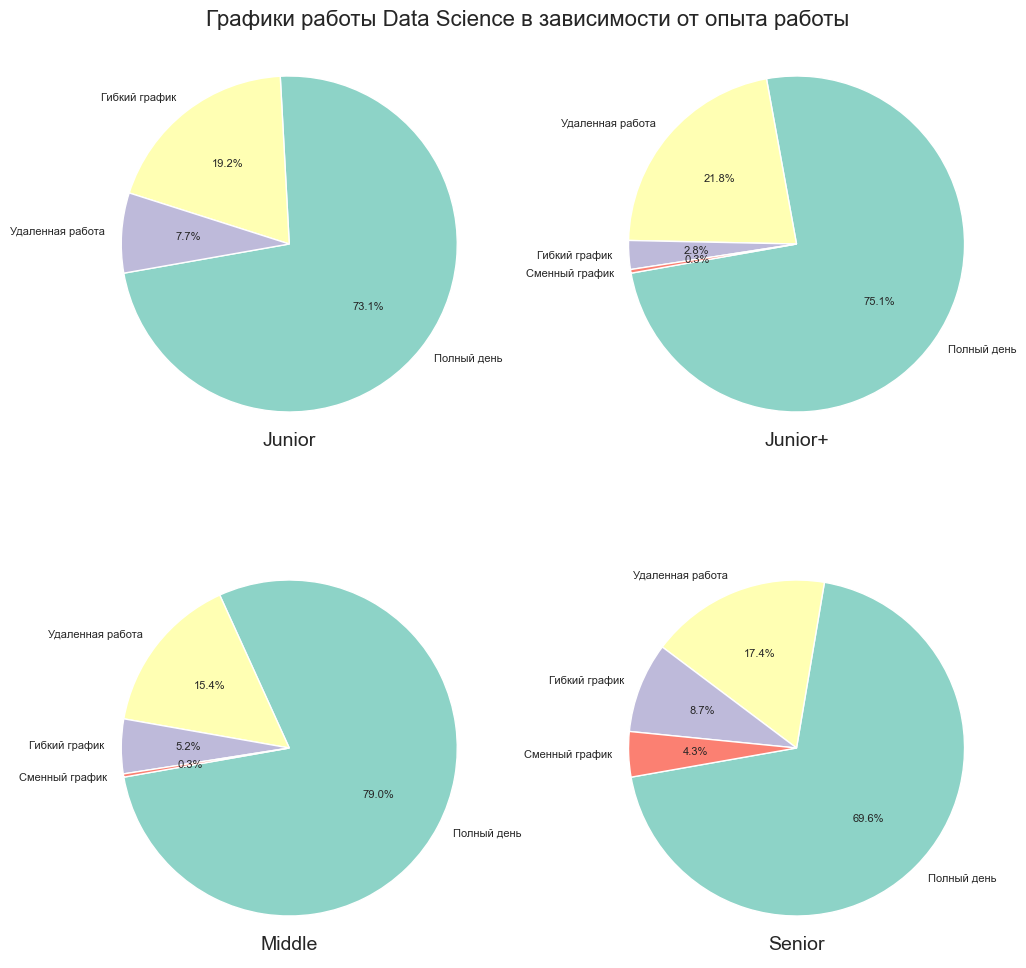

In [90]:
# Построим графики
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Графики работы Data Science в зависимости от опыта работы', fontsize=16, y = 0.9)
axes[0, 0].pie(x=dssc_1['schedule'], labels=dssc_1['index'], colors = color, autopct='%1.1f%%', textprops={'fontsize':8}, startangle=190)
axes[0, 0].set_title('Junior', fontsize=14, y = 0);
axes[0, 1].pie(x=dssc_2['schedule'], labels=dssc_2['index'], colors = color, autopct='%1.1f%%', textprops={'fontsize':8},startangle=190)
axes[0, 1].set_title('Junior+', fontsize=14, y = 0);
axes[1, 0].pie(x=dssc_3['schedule'], labels=dssc_3['index'], colors = color, autopct='%1.1f%%', textprops={'fontsize':8}, startangle=190)
axes[1, 0].set_title('Middle', fontsize=14, y = 0);
axes[1, 1].pie(x=dssc_4['schedule'], labels=dssc_4['index'], colors = color, autopct='%1.1f%%', textprops={'fontsize':8},startangle=190)
axes[1, 1].set_title('Senior', fontsize=14, y = 0);

**Вывод:** как видно из графиков в основном для всех категорий Data Analyst и Data Science предлагается полный рабочий день.

#### Тип занятости

In [91]:
# Определим тип занятости исходя из опыта работы
dase_1 = data.loc[(data['type'] == 'da') & (data['experience'] == 'Junior (no experince)'), 'employment'].value_counts().reset_index()
dase_2 = data.loc[(data['type'] == 'da') & (data['experience'] == 'Junior+ (1-3 years)'), 'employment'].value_counts().reset_index()
dase_3 = data.loc[(data['type'] == 'da') & (data['experience'] == 'Middle (3-6 years)'), 'employment'].value_counts().reset_index()
dase_4 = data.loc[(data['type'] == 'da') & (data['experience'] == 'Senior (6+ years)'), 'employment'].value_counts().reset_index()
dsse_1 = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Junior (no experince)'), 'employment'].value_counts().reset_index()
dsse_2 = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Junior+ (1-3 years)'), 'employment'].value_counts().reset_index()
dsse_3 = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Middle (3-6 years)'), 'employment'].value_counts().reset_index()
dsse_4 = data.loc[(data['type'] == 'ds') & (data['experience'] == 'Senior (6+ years)'), 'employment'].value_counts().reset_index()

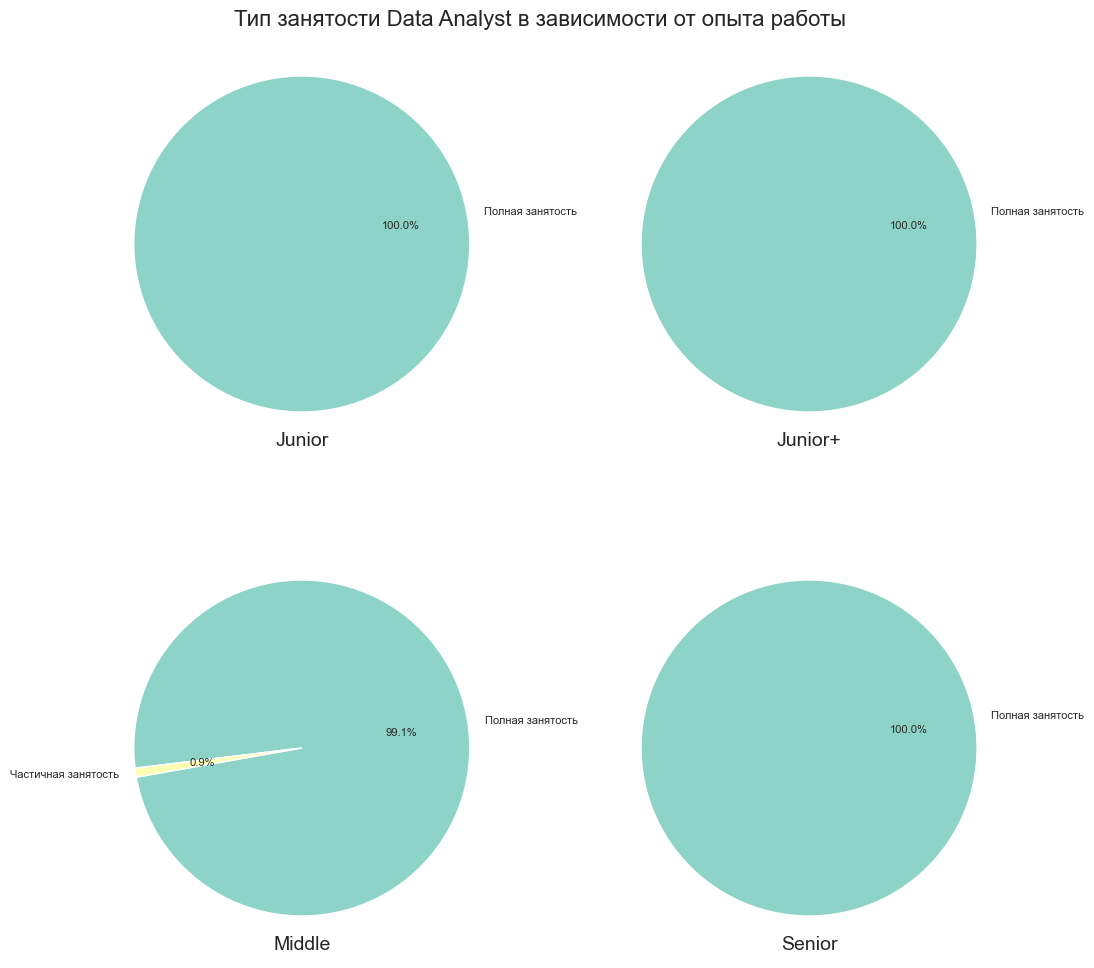

In [92]:
# Построим графики
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Тип занятости Data Analyst в зависимости от опыта работы', fontsize=16, y = 0.9)
axes[0, 0].pie(x=dase_1['employment'], labels=dase_1['index'], colors = color, autopct='%1.1f%%', textprops={'fontsize':8}, startangle=190)
axes[0, 0].set_title('Junior', fontsize=14, y = 0);
axes[0, 1].pie(x=dase_2['employment'], labels=dase_2['index'], colors = color, autopct='%1.1f%%', textprops={'fontsize':8},startangle=190)
axes[0, 1].set_title('Junior+', fontsize=14, y = 0);
axes[1, 0].pie(x=dase_3['employment'], labels=dase_3['index'], colors = color, autopct='%1.1f%%', textprops={'fontsize':8}, startangle=190)
axes[1, 0].set_title('Middle', fontsize=14, y = 0);
axes[1, 1].pie(x=dase_4['employment'], labels=dase_4['index'], colors = color, autopct='%1.1f%%', textprops={'fontsize':8},startangle=190)
axes[1, 1].set_title('Senior', fontsize=14, y = 0);

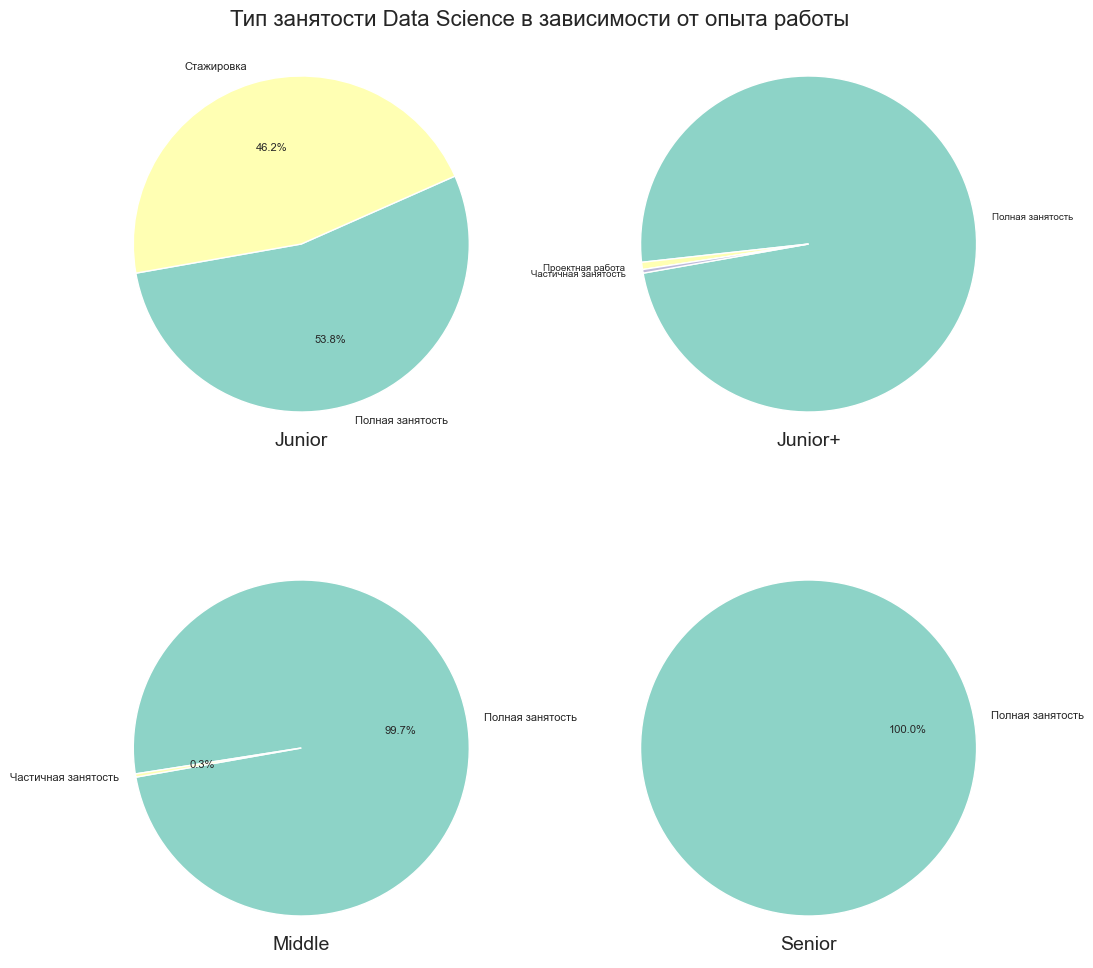

In [93]:
# Построим графики
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Тип занятости Data Science в зависимости от опыта работы', fontsize=16, y = 0.9)
axes[0, 0].pie(x=dsse_1['employment'], labels=dsse_1['index'], colors = color, autopct='%1.1f%%', textprops={'fontsize':8}, startangle=190)
axes[0, 0].set_title('Junior', fontsize=14, y = 0);
axes[0, 1].pie(x=dsse_2['employment'], labels=dsse_2['index'], colors = color, textprops={'fontsize':7},startangle=190)
axes[0, 1].set_title('Junior+', fontsize=14, y = 0);
axes[1, 0].pie(x=dsse_3['employment'], labels=dsse_3['index'], colors = color, autopct='%1.1f%%', textprops={'fontsize':8}, startangle=190)
axes[1, 0].set_title('Middle', fontsize=14, y = 0);
axes[1, 1].pie(x=dsse_4['employment'], labels=dsse_4['index'], colors = color, autopct='%1.1f%%', textprops={'fontsize':8},startangle=190)
axes[1, 1].set_title('Senior', fontsize=14, y = 0);

**Вывод**: Как видно из графиков для Data Analyst предлагается полная занятоcть. Для Data Science в основном предлагается полная занятость, вместе с тем для 46 % категорий Junior предлагается стажировка.

### Расчет динамики количества вакансий для Аналитика данных и специалиста по Data Science

In [94]:
# Определим дату публикации всех вакансий
da_time = data.query("type == 'da'").groupby('published_at')['id'].count().reset_index()
ds_time = data.query("type == 'ds'").groupby('published_at')['id'].count().reset_index()

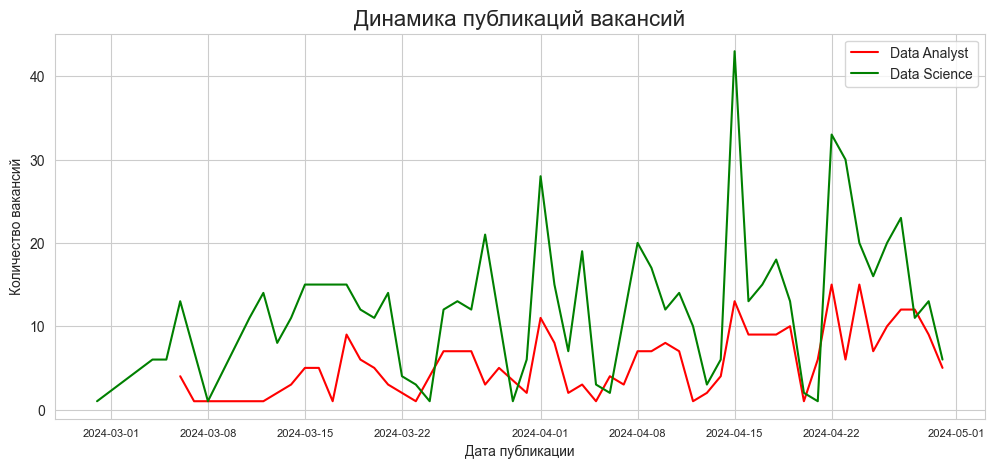

In [95]:
# построим график
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data = da_time, x='published_at', y = 'id', color='red')
sns.lineplot(data = ds_time, x='published_at', y = 'id', color='green')
plt.tick_params(axis='x', labelsize=8)
plt.title('Динамика публикаций вакансий', fontsize=16)
plt.xlabel('Дата публикации')
plt.ylabel('Количество вакансий')
plt.legend(['Data Analyst', 'Data Science'])
plt.show()

In [96]:
# Определим дату публикации June
da_time_1 = data.query("type == 'da' & experience == 'Junior (no experince)'").groupby('published_at')['id'].count().reset_index()
ds_time_1 = data.query("type == 'ds' & experience == 'Junior (no experince)'").groupby('published_at')['id'].count().reset_index()

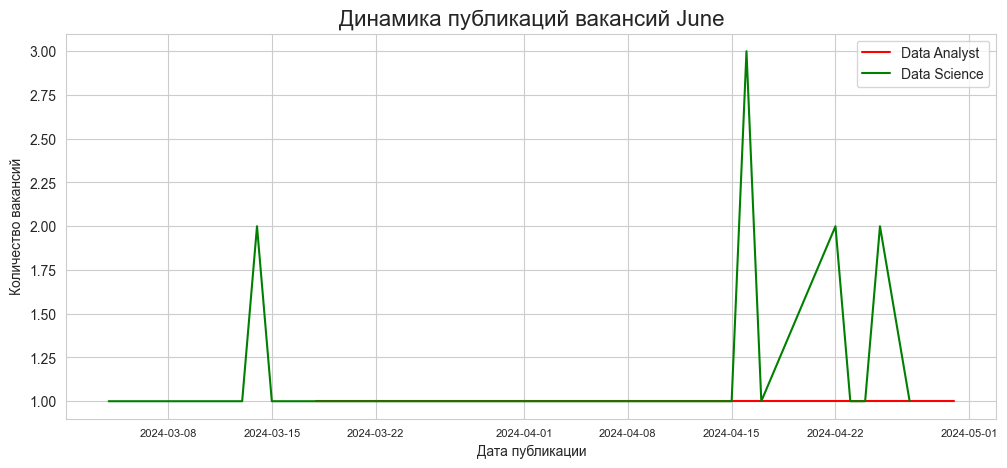

In [97]:
# Построим график
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data = da_time_1, x='published_at', y = 'id', color='red')
sns.lineplot(data = ds_time_1, x='published_at', y = 'id', color='green')
plt.tick_params(axis='x', labelsize=8)
plt.title('Динамика публикаций вакансий June', fontsize=16)
plt.xlabel('Дата публикации')
plt.ylabel('Количество вакансий')
plt.legend(['Data Analyst', 'Data Science'])
plt.show()

In [98]:
# Определим дату публикации June +
da_time_2 = data.query("type == 'da' & experience == 'Junior+ (1-3 years)'").groupby('published_at')['id'].count().reset_index()
ds_time_2 = data.query("type == 'ds' & experience == 'Junior+ (1-3 years)'").groupby('published_at')['id'].count().reset_index()

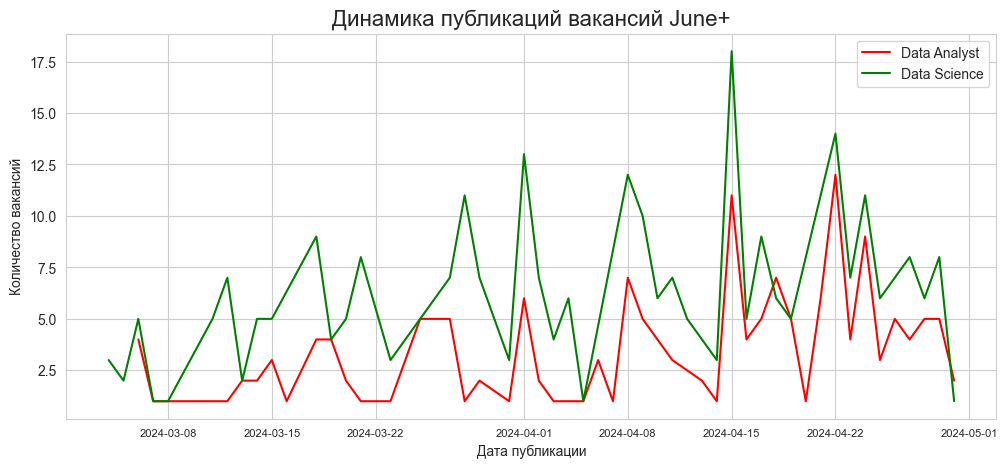

In [99]:
# Построим график
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data = da_time_2, x='published_at', y = 'id', color='red')
sns.lineplot(data = ds_time_2, x='published_at', y = 'id', color='green')
plt.tick_params(axis='x', labelsize=8)
plt.title('Динамика публикаций вакансий June+', fontsize=16)
plt.xlabel('Дата публикации')
plt.ylabel('Количество вакансий')
plt.legend(['Data Analyst', 'Data Science'])
plt.show()

In [100]:
# Определим дату публикации Middle
da_time_3 = data.query("type == 'da' & experience == 'Middle (3-6 years)'").groupby('published_at')['id'].count().reset_index()
ds_time_3 = data.query("type == 'ds' & experience == 'Middle (3-6 years)'").groupby('published_at')['id'].count().reset_index()

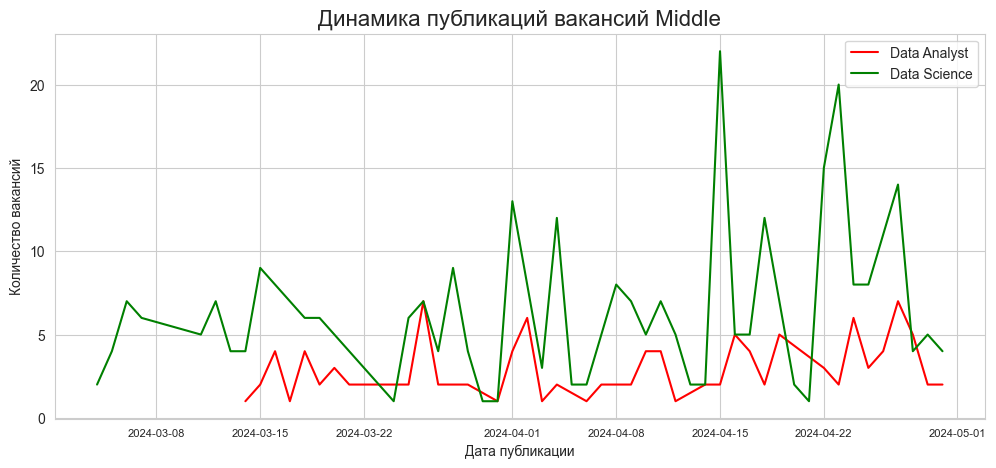

In [101]:
# Построим график
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data = da_time_3, x='published_at', y = 'id', color='red')
sns.lineplot(data = ds_time_3, x='published_at', y = 'id', color='green')
plt.tick_params(axis='x', labelsize=8)
plt.title('Динамика публикаций вакансий Middle', fontsize=16)
plt.xlabel('Дата публикации')
plt.ylabel('Количество вакансий')
plt.legend(['Data Analyst', 'Data Science'])
plt.show()

In [102]:
# Определим дату публикации Middle
da_time_4 = data.query("type == 'da' & experience == 'Senior (6+ years)'").groupby('published_at')['id'].count().reset_index()
ds_time_4 = data.query("type == 'ds' & experience == 'Senior (6+ years)'").groupby('published_at')['id'].count().reset_index()

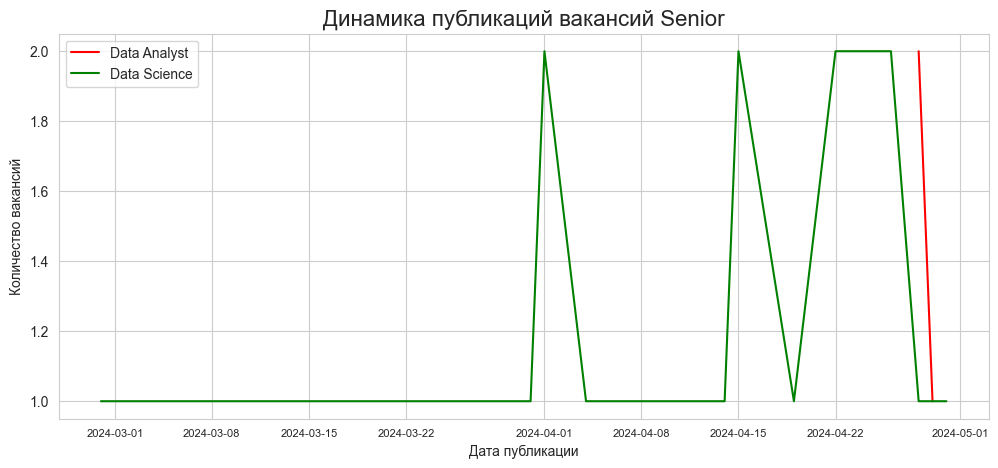

In [103]:
# Построим график
fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(data = da_time_4, x='published_at', y = 'id', color='red')
sns.lineplot(data = ds_time_4, x='published_at', y = 'id', color='green')
plt.tick_params(axis='x', labelsize=8)
plt.title('Динамика публикаций вакансий Senior', fontsize=16)
plt.xlabel('Дата публикации')
plt.ylabel('Количество вакансий')
plt.legend(['Data Analyst', 'Data Science'])
plt.show()

**Вывод**: какую либо зависимость в динамике по времени публикаций общих вакансий отследить сложно. Вместе с тем можно заметить, что больше всего публикуют вакансии из категории Data Analyst. Кроме того, что у Data Analyst, что у Data Science больше всего вакансий публикуют из категории June+ и Middle.

**Общий вывод**:
- установлено, что Среди Data Analyst больше всего вакансий у Junior+, меньше всего у Senior. У Data Science больше всего вакансий у Middle, меньше всего у Senior;
- основными важными навыками в основном для всех категорий Data Analyst и Data Senior является знание SQL и Python. Также необходимо знать статистику;
- для всех категорий Data Analyst к требованиям добавляется знание Power BI и Tableau;
- для Data Science Junior+ и Data Science Middle к требованиям добавляется nlp (Natural Language Processing). Также Data Science Middle и Data Science Senior должны уметь работать с платфоромй Hadoop. Кроме того специалисты Data Science выше Junior должны уметь работать с PyTorch и GIT; 
- для Data Analyst Senior и Data Science Senior добавляется знание английского языка;
- У Data Analyst Junior и Data Science категории Junior и Junior+ самыми важными Soft навыками являются в основном коммуникация и аналитическое мышление. У Data Science Junior к этим двум навыкам добавляется презентация результатов.У Data Analyst Junior и Data Science категории Middle и Senior самыми важными Soft навыками являются в основном коммуникация и документация (работа с документами);
- у  Data Analyst Junior и Data Science Junior основными навыками являются коммуникация и документация (работа с документами);
- у позиции Data Analyst с опытом June+ и Middle больше всего вакансий у Сбера; 
- у позиции Data Science также больше всего вакансий у Сбера среди категорий June, June+ и Middle;
- также по количеству вакансий на позицию Data Analyst June+ следом идут такие компании как МТС, ПСБ и Магнит;
- по количеству вакансий на позицию Data Analyst Middle после Сбера идут Wildberries;
- на позицию Data Science June и Data Science Middle по количеству вакансий после Сбера идеть Ozon. На позицию Data Science Senior больше всего набирают Fundraise UP, Sape, Aramco Innoivations и СБЕР;
- как видно из графиков большая часть данных по зарплате отсутствует, в связи с чем вывод можно составить только условный. В категории Data Science June и Data Analyst June уровень зарплат составляет менее 100 тыс. рублей. В категории Data Analyst June+ большая часть предложений попадает в категорию от 100 до 200 тыс. рублей. В разделе Data Analyst Middle в среднем зарплаты идут от  200 тысяч. В то же время разделе Data Science June+ зарплаты в среднем от 100 тыс. рублей, имеются предложения в категории от 200 до 300 тыс. рублей. В разделе Data Scieence Middle зарплаты в среднем от 200 тыс. рублей. В разделе Data Science Senior есть предложения больше 300 тысяч рублей.  ;
- в основном для всех категорий Data Analyst и Data Science предлагается полный рабочий день и полная занятоcть (для Data Science Junior 46 % вакансий - стажировка);
- больше всего публикуют вакансии из категории Data Science. Кроме того, что у Data Analyst, что у Data Science больше всего вакансий публикуют из категории June+ и Middle.

**Рекомендации по Data Analyst:**  
работодателю будет интересен специалист в этой области начиная с June+ на полный рабочий день с полной занятостью. Соискателю рекомендуется уверенно владеть Pythion, SQL. Среди желательных навыков фигурирует и Numpy. Среди BI систем требуется знание Power BI и Tableau. У позиции Data Analyst с опытом June+ и Middle больше всего вакансий у Сбера,- у позиции Data Analyst June больше вакансий у РЕСО-Гарантия.



**Рекомендации по Data Scientist:**  
работодателю  будет интересен специалист в этой области начиная с June+ на полный рабочий день с полной занятостью (вместе с тем для Data Science Junior 46 % вакансий - стажировка). Соискателю рекомендуется уверенно владеть Pythion, SQL. Кроме того рекомендуется уметь работать с платфоромй Hadoop, а также с PyTorch и GIT. У позиции Data Science больше всего вакансий у Сбера,- у позиций Data Science June и Data Science Middle после Сбера по количеству вакансий идет Ozon, а у Data Science June+ ‒ Ростелеком
.

Презентация:
https://disk.yandex.ru/edit/disk/disk%2F%D0%9F%D1%80%D0%B5%D0%B7%D0%B5%D0%BD%D1%82%D0%B0%D1%86%D0%B8%D1%8F%20%28%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B2%D0%B0%D0%BA%D0%B0%D0%BD%D1%81%D0%B8%D0%B9%29.pptx?sk=yfb2fc60c371ffc38daae070a1f762837